# Assignment 2 - SUPPORT2 Darren's Edition

## Introduction 

My task as data scientist was to evaluate and analyse the dataset given, 'Support2-1.csv'. The dataset comprises patient records from critically ill patients across five medical centres in the United States. The hospitalised patient records are recorded when the patients meet some or all of the criteria, such as: 

- Acute respiratory failure
- Chronic obstructive pulmonary disease
- Congestive heart failure
- Liver disease
- Coma
- Colon cancer
- Lung cancer
- Multiple organ system failure with malignancy
- Multiple organ system failure with sepsis

The key goal is to find the survival rates for the patients. To determine different factors that may contribute to the mortality rate and find any other findings that may help the critically ill patients through their ordeal during these hard times.

This project was a group, this notebook contains all the contribution from my side. I was incharge of the data cleaning, IDA anaylsis and the quesitons to answer in the EDA below. 

## Data Cleaning

This section is to prepare the dataset for the initial data analysis (IDA) and exploratory data analysis (EDA).

The initial step is to understand the dataframe I'm working with and to find the necessary techniques for this stage.

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Display the the full view of the dataframe 
pd.set_option('display.max_columns', None)

#### Loading the dataset to the notebook

In [2]:
# Creating a variable called 'df' to hold the support2 data set 

df = pd.read_csv('support2-1.csv')


In [3]:
df.head()

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


#### Checking the size of the data frame.

In [4]:
print(f'The number of rows in this data frame is: {df.shape[0]}')
print(f'The number of columns in this data frame is: {df.shape[1]} \n')

The number of rows in this data frame is: 9105
The number of columns in this data frame is: 48 



#### Printing data frame information. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

There are 9105 entries within the data frame however, some columns contain NaN values. 

To deal with this the columns with the missing NaN will have to be removed or replaced from the data frame to avoid inaccurate reuslts and outliers 

## Dealing with empty or Null values

There are several columns with one NaN value. These columns may be linked or from the same entry.


To confirm this theory a new data frame will be created to extract the columns with one missing values to from df and removed from the main df.

In [6]:
# Filtering df with all the columns containing 9104 entries into a new df called df_missingOneValue

df_missingOneValue = df[['ID', 'scoma', 'sps', 'aps', 'surv2m', 'surv6m', 'meanbp', 'hrt', 'resp', 'temp', 'sod']]

In [7]:
# Using scoma column to check for NaN value with the is.na function
df_missingOneValue[df_missingOneValue['scoma'].isna()]

,ID,scoma,sps,aps,surv2m,surv6m,meanbp,hrt,resp,temp,sod
5393,5394,NaN,NaN,NaN,NaN,NaN,55.0,110.0,25.0,35.89844,133.0


In [8]:
# Using sod column to check for NaN value with the is.na function 

df_missingOneValue[df_missingOneValue['sod'].isna()]

,ID,scoma,sps,aps,surv2m,surv6m,meanbp,hrt,resp,temp,sod
5440,5441,0.0,31.398438,60.0,0.7229,0.638916,NaN,NaN,NaN,NaN,NaN


The theory was proven wrong since there are two separate entries.

Now it's time to remove both entries from the data frame

In [9]:
df = df.drop(df[df['ID'] == 5394].index)

In [10]:
df = df.drop(df[df['ID'] == 5440].index)

In [11]:
print(f'Now there are {df.shape[0]} entries in the df')

Now there are 9103 entries in the df


### Next is to remove the columns with null values 

In [12]:
df_missingColumns = df[['ID', 'edu', 'income', 'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps', 'prg2m', 
                 'prg6m', 'dnr', 'dnrday', 'wblc', 'pafi', 'alb', 'bili', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2']]

print(f'Created a data frame containing all the columns with missing values.\n {df_missingColumns.head(2)}')


Created a data frame containing all the columns with missing values.
    ID   edu    income  scoma  charges  totcst  totmcst  avtisst   race  \
0   1  11.0  $11-$25k    0.0   9715.0     NaN      NaN      7.0  other   
1   2  12.0  $11-$25k   44.0  34496.0     NaN      NaN     29.0  white   

         sps   aps  prg2m  prg6m     dnr  dnrday       wblc   pafi       alb  \
0  33.898438  20.0    0.5   0.25  no dnr     5.0   6.000000  388.0  1.799805   
1  52.695312  74.0    0.0   0.00     NaN     NaN  17.097656   98.0       NaN   

       bili        ph  glucose  bun  urine  adlp  adls             sfdm2  
0  0.199982  7.459961      NaN  NaN    NaN   7.0   7.0               NaN  
1       NaN  7.250000      NaN  NaN    NaN   NaN   1.0  <2 mo. follow-up  


#### Columns with missing values summarised:

- edu: Years of Education (TO REMOVE COLUMN)
- income: Yearly income of the patient (KEEP, REPLACE VALUES WITH 0)
- scoma: is a system to measure how conscious patients are using the Glasgow coma scale (TO REMOVE COLUMN)
- charges: Hospital charges (KEEP, REPLACE MISSING VALUES WITH 0)
- totcst: total ratio costs to charges (TO REMOVE COLUMN)
- totmcst: total micro cost (TO REMOVE COLUMN)
- avtisst: is a therapeutic Intervention scoring system used to calculate the costs in IMCU (intermediate care unit) and ICU (TO REMOVE COLUMN)
- race: Patient ethnicity (REMOVE MISSING VALUES)
- sps: Patient physiology score (TO REMOVE COLUMN)
- aps: Apache III score system (TO REMOVE COLUMN)
- prg2m: Physicians estimate that the patient will survive for 2 months (TO REMOVE COLUMN)
- prg6m: Physicians estimate that the patient will survive for 6 months (TO REMOVE COLUMN)
- dnr: DNR (or Do Not Resuscitate), patient orders a DNR order or not. (REMOVE MISSING VALUES)
- dnrday: Day of the DNR order, after the patient's admission (TO REMOVE COLUMN)
- wblc: White blood cell count in the thousands. low white blood cell count = less than 4,000, high white blood cell count above 11,000  (REMOVE MISSING VALUES)
- pafi: used to measure hypoxaemia (abnormally low oxygen level in the blood). (REMOVE COLUMN or ROW)
- alb: Measure the measurement score of albumin levels and the amount of the protein albumin found in the blood (TO REMOVE COLUMN)
- bili: Measurement of the bilirubin levels found in red blood cells (REMOVE MISSING ROW)
- crea: Measuring the creatine levels in the blood (TO REMOVE COLUMN)
- ph: pH in blood measures how acidic the blood is. (TO REMOVE COLUMN)
- glucose: patient's glucose level results  (TO REMOVE COLUMN)
- bun: Use to measure the kidney function (TO REMOVE COLUMN)
- urine: urine sample from patients (TO REMOVE COLUMN)
- adlp: Patient daily activity score, filled by patients. (TO REMOVE COLUMN)
- adls: Patient daily activity score, filled by surrogates. (TO REMOVE COLUMN)
- sfdm2: Measure the disability of the patient (TO REMOVE COLUMN)
- dzclass: Patient diagnoses class (TO REMOVE COLUMN)
- hday: The day patients entered the study (TO REMOVE COLUMN)
- dementia: if the patients showed signs of dementia (TO REMOVE COLUMN)
- resp: respiration rate of the patient (TO REMOVE COLUMN)
- meanbp: measure the arterial blood pressure to check if enough blood is supplied to vital organs (REMOVE A MISSING VALUE)
- temp: Patient recorded temperature on day 3 (REMOVE A MISSING VALUE)
- hrt: The heart rate of the patient was measured on day 3. (REMOVE MISSING VALUES)
- adlsc: adlp and adls combined and filled in the missing values (CHANGE DATA TYPE TO INT)

#### Columns without missing values: 

- age: Patients age (change the data type to int)
- death: If the patients have died (0 = alive, 1 = died)
- sex: Patient gender
- hospdead: if the patient has died in the hospital (0 = outside of hospital or alive, 1 = died in the hospital)
- slos: days from Study Entry to Discharge
- d.time: days of follow-up 
- dzgroup: Patient diagnoses categorised
- num.co: Patients with one or more diagnoses
- surv2m: 2 month survival estimation
- surv2m: 6 month survival estimation
- diabetes: If the patients showed signs of diabetes (0 = no diabetes, 1 = diabetic)
- ca: If the patient has cancer (yes), spread out (metastatic), or if they are healthy(no)
- sod: Measure the sodium concentration in the blood


##### To keep with data intergrity some columns or row with missing values are removed and the rest will be replaced with a value.



### The next step is to remove all the columns from the df marked as 'TO REMOVE COLUMN'.

In [13]:
df = df.drop(['edu', 'scoma', 'totcst', 'totmcst','avtisst', 'sps', 'aps', 'prg2m', 'prg6m','dnrday', 'pafi', 'alb', 'bili', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls','sfdm2', 'dzclass', 'hday','dementia', 'resp'], axis = 1)

In [14]:
df.head(3)

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,0,$11-$25k,9715.0,other,0.262939,0.036995,0,metastatic,no dnr,97.0,6.000000,69.0,36.00000,1.199951,141.0,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,2,$11-$25k,34496.0,white,0.001000,0.000000,0,no,NaN,43.0,17.097656,112.0,34.59375,5.500000,132.0,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,2,under $11k,41094.0,white,0.790894,0.664917,0,no,no dnr,70.0,8.500000,88.0,37.39844,2.000000,134.0,0.0


#### Removing missing values from rows 

In [15]:
df = df.dropna(subset=['dnr'])

In [16]:
df = df.dropna(subset=['wblc'])

In [17]:
df = df.dropna(subset=['race'])

In [18]:
df = df.dropna(subset=['crea'])

#### The updated data frame after removing columns and rows with missing null values

In [19]:
print(f'The number of rows in this data frame is: {df.shape[0]}')
print(f'The number of columns in this data frame is: {df.shape[1]} \n')

df.info()

The number of rows in this data frame is: 8802
The number of columns in this data frame is: 24 

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 0 to 9104
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        8802 non-null   int64  
 1   age       8802 non-null   float64
 2   death     8802 non-null   int64  
 3   sex       8802 non-null   object 
 4   hospdead  8802 non-null   int64  
 5   slos      8802 non-null   int64  
 6   d.time    8802 non-null   int64  
 7   dzgroup   8802 non-null   object 
 8   num.co    8802 non-null   int64  
 9   income    5946 non-null   object 
 10  charges   8658 non-null   float64
 11  race      8802 non-null   object 
 12  surv2m    8802 non-null   float64
 13  surv6m    8802 non-null   float64
 14  diabetes  8802 non-null   int64  
 15  ca        8802 non-null   object 
 16  dnr       8802 non-null   object 
 17  meanbp    8802 non-null   float64
 18  wblc      8802 n

#### Final step: Adding missing values to the remaining missing columns with the appropriate value

In [20]:
# Checking all the unique entries in the income column 

df['income'].unique()

array(['$11-$25k', 'under $11k', nan, '$25-$50k', '>$50k'], dtype=object)

In [21]:
## Checking all the NaN values in income

df[df['income'].isna()]

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,1,NaN,50127.0,white,0.634888,0.532959,0,no,no dnr,59.0,13.500000,112.0,37.89844,0.799927,143.0,2.000000
5,6,93.01599,1,male,1,4,4,Coma,1,NaN,6884.0,white,0.284973,0.214996,0,no,no dnr,110.0,10.398438,101.0,38.39844,0.699951,140.0,1.000000
7,8,86.83899,1,male,0,7,142,CHF,3,NaN,30460.0,white,0.670898,0.498962,1,no,no dnr,72.0,13.599609,100.0,37.59375,2.000000,139.0,0.000000
8,9,85.65594,1,male,0,12,63,Lung Cancer,2,NaN,NaN,black,0.570923,0.248993,0,metastatic,dnr after sadm,97.0,9.699219,56.0,36.59375,1.000000,143.0,7.000000
10,11,47.94498,1,male,0,7,114,CHF,1,NaN,15558.0,white,0.935913,0.890991,0,no,no dnr,70.0,10.898438,105.0,36.50000,1.000000,134.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,9096,80.60199,1,female,0,6,295,CHF,3,NaN,4047.0,white,0.869995,0.783936,1,no,no dnr,69.0,23.500000,104.0,36.19531,0.699951,132.0,1.838867
9098,9099,70.42297,1,male,0,15,17,ARF/MOSF w/Sepsis,4,NaN,80504.0,white,0.531982,0.416992,1,yes,dnr after sadm,129.0,24.597656,57.0,37.50000,1.199951,136.0,2.714844
9100,9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,1,NaN,52870.0,white,0.852905,0.801880,0,no,no dnr,109.0,7.399414,104.0,35.69531,1.099854,131.0,0.000000
9102,9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,1,NaN,46564.0,white,0.741943,0.660889,0,no,no dnr,111.0,8.398438,83.0,36.69531,2.699707,139.0,2.525391


In [22]:
# Using .fillna to replace the missing values in the income column with 'undisclosed' value

df['income'] = df['income'].fillna('undisclosed')

In [23]:
# Double checking the fill function has worked 

df[df['income'] == 'undisclosed'].head(2)

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,1,undisclosed,50127.0,white,0.634888,0.532959,0,no,no dnr,59.0,13.500000,112.0,37.89844,0.799927,143.0,2.0
5,6,93.01599,1,male,1,4,4,Coma,1,undisclosed,6884.0,white,0.284973,0.214996,0,no,no dnr,110.0,10.398438,101.0,38.39844,0.699951,140.0,1.0


In [24]:
df[df['charges'].isna()]

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc
8,9,85.65594,1,male,0,12,63,Lung Cancer,2,undisclosed,NaN,black,0.570923,0.248993,0,metastatic,dnr after sadm,97.0,9.699219,56.0,36.59375,1.000000,143.0,7.000000
405,406,54.93198,0,male,0,49,1701,Cirrhosis,3,undisclosed,NaN,white,0.431946,0.230988,0,no,no dnr,43.0,8.500000,120.0,38.89844,3.799805,145.0,2.975586
640,641,77.67596,1,female,0,12,59,ARF/MOSF w/Sepsis,2,$11-$25k,NaN,black,0.699951,0.609985,0,metastatic,no dnr,85.0,11.398438,110.0,36.89844,1.199951,134.0,2.000000
712,713,73.59094,1,female,0,124,200,ARF/MOSF w/Sepsis,0,under $11k,NaN,white,0.379944,0.261963,0,no,no dnr,68.0,27.500000,110.0,38.50000,1.099854,131.0,2.776367
979,980,19.76500,1,male,1,6,6,ARF/MOSF w/Sepsis,0,undisclosed,NaN,hispanic,0.738892,0.657959,0,no,no dnr,45.0,18.796875,145.0,38.39844,1.699951,135.0,2.135742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5375,63.46899,1,male,1,7,7,Lung Cancer,3,under $11k,NaN,white,0.541992,0.218994,0,metastatic,dnr after sadm,123.0,7.399414,74.0,36.00000,1.000000,145.0,2.740723
5376,5377,71.25800,1,male,1,5,5,Coma,2,$11-$25k,NaN,black,0.425964,0.351990,1,no,dnr after sadm,80.0,10.898438,112.0,34.50000,1.000000,138.0,2.354980
5377,5378,59.16998,1,female,1,3,3,MOSF w/Malig,1,undisclosed,NaN,black,0.000000,0.000000,0,yes,dnr after sadm,77.0,7.699219,68.0,37.89844,0.699951,141.0,2.060547
5455,5456,67.26099,1,male,1,4,4,ARF/MOSF w/Sepsis,1,under $11k,NaN,white,0.000000,0.000000,0,no,dnr after sadm,68.0,5.500000,115.0,39.19531,1.199951,155.0,0.000000


In [25]:
# Using .fillna to replace the missing values in the charges column with a median values.
df_median = df['charges'].round().median()

print(f'Median Charge is {df_median}')

df['charges'] = df['charges'].fillna(df_median)


Median Charge is 25389.5


In [26]:
# Double checking the fill function has worked 

df[df['charges'] == 25389.5]

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc
8,9,85.65594,1,male,0,12,63,Lung Cancer,2,undisclosed,25389.5,black,0.570923,0.248993,0,metastatic,dnr after sadm,97.0,9.699219,56.0,36.59375,1.000000,143.0,7.000000
405,406,54.93198,0,male,0,49,1701,Cirrhosis,3,undisclosed,25389.5,white,0.431946,0.230988,0,no,no dnr,43.0,8.500000,120.0,38.89844,3.799805,145.0,2.975586
640,641,77.67596,1,female,0,12,59,ARF/MOSF w/Sepsis,2,$11-$25k,25389.5,black,0.699951,0.609985,0,metastatic,no dnr,85.0,11.398438,110.0,36.89844,1.199951,134.0,2.000000
712,713,73.59094,1,female,0,124,200,ARF/MOSF w/Sepsis,0,under $11k,25389.5,white,0.379944,0.261963,0,no,no dnr,68.0,27.500000,110.0,38.50000,1.099854,131.0,2.776367
979,980,19.76500,1,male,1,6,6,ARF/MOSF w/Sepsis,0,undisclosed,25389.5,hispanic,0.738892,0.657959,0,no,no dnr,45.0,18.796875,145.0,38.39844,1.699951,135.0,2.135742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5375,63.46899,1,male,1,7,7,Lung Cancer,3,under $11k,25389.5,white,0.541992,0.218994,0,metastatic,dnr after sadm,123.0,7.399414,74.0,36.00000,1.000000,145.0,2.740723
5376,5377,71.25800,1,male,1,5,5,Coma,2,$11-$25k,25389.5,black,0.425964,0.351990,1,no,dnr after sadm,80.0,10.898438,112.0,34.50000,1.000000,138.0,2.354980
5377,5378,59.16998,1,female,1,3,3,MOSF w/Malig,1,undisclosed,25389.5,black,0.000000,0.000000,0,yes,dnr after sadm,77.0,7.699219,68.0,37.89844,0.699951,141.0,2.060547
5455,5456,67.26099,1,male,1,4,4,ARF/MOSF w/Sepsis,1,under $11k,25389.5,white,0.000000,0.000000,0,no,dnr after sadm,68.0,5.500000,115.0,39.19531,1.199951,155.0,0.000000


#### Next step is to change the Data types for some of the information 

There are no null values in the dataframe

# Changing and Correcting Data Types 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 0 to 9104
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        8802 non-null   int64  
 1   age       8802 non-null   float64
 2   death     8802 non-null   int64  
 3   sex       8802 non-null   object 
 4   hospdead  8802 non-null   int64  
 5   slos      8802 non-null   int64  
 6   d.time    8802 non-null   int64  
 7   dzgroup   8802 non-null   object 
 8   num.co    8802 non-null   int64  
 9   income    8802 non-null   object 
 10  charges   8802 non-null   float64
 11  race      8802 non-null   object 
 12  surv2m    8802 non-null   float64
 13  surv6m    8802 non-null   float64
 14  diabetes  8802 non-null   int64  
 15  ca        8802 non-null   object 
 16  dnr       8802 non-null   object 
 17  meanbp    8802 non-null   float64
 18  wblc      8802 non-null   float64
 19  hrt       8802 non-null   float64
 20  temp      8802 non-null   float64
 

#### Filtering the df with all the numeric columns to double-check if the values in each entry are in the correct type or format 

In [28]:
df[['age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'charges', 'surv2m', 'surv6m', 'diabetes', 'meanbp', 'wblc', 'hrt', 'temp', 'crea', 'sod', 'adlsc']].head(30)

,age,death,hospdead,slos,d.time,num.co,charges,surv2m,surv6m,diabetes,meanbp,wblc,hrt,temp,crea,sod,adlsc
0,62.84998,0,0,5,2029,0,9715.0,0.262939,0.036995,0,97.0,6.000000,69.0,36.00000,1.199951,141.0,7.000000
2,52.74698,1,0,17,47,2,41094.0,0.790894,0.664917,0,70.0,8.500000,88.0,37.39844,2.000000,134.0,0.000000
3,42.38498,1,0,3,133,2,3075.0,0.698975,0.411987,0,75.0,9.099609,88.0,35.00000,0.799927,139.0,0.000000
4,79.88495,0,0,16,2029,1,50127.0,0.634888,0.532959,0,59.0,13.500000,112.0,37.89844,0.799927,143.0,2.000000
5,93.01599,1,1,4,4,1,6884.0,0.284973,0.214996,0,110.0,10.398438,101.0,38.39844,0.699951,140.0,1.000000
6,62.37097,1,0,9,659,1,30460.0,0.892944,0.820923,0,78.0,11.699219,120.0,37.39844,1.599854,132.0,1.000000
7,86.83899,1,0,7,142,3,30460.0,0.670898,0.498962,1,72.0,13.599609,100.0,37.59375,2.000000,139.0,0.000000
8,85.65594,1,0,12,63,2,25389.5,0.570923,0.248993,0,97.0,9.699219,56.0,36.59375,1.000000,143.0,7.000000
9,42.25897,1,0,8,370,0,9914.0,0.952881,0.887939,0,84.0,11.298828,94.0,38.19531,0.799927,139.0,0.494800
10,47.94498,1,0,7,114,1,15558.0,0.935913,0.890991,0,70.0,10.898438,105.0,36.50000,1.000000,134.0,1.000000


#### Changing the following columns:

- age -> int type
- charges -> int type
- meanbp -> int type
- hrt -> int type
- sod -> int type
- adlsc -> int type

In [29]:
# The code below will convert the data's from float to int

df = df.astype({'age': 'int', 
                'charges': 'int', 
                'meanbp': 'int', 
                'hrt': 'int', 
                'sod': 'int', 
                'adlsc': 'int'})

In [30]:
### Double checking if the conversion worked

df[['age', 'death', 'hospdead', 'num.co', 'charges', 'surv2m', 'surv6m', 'diabetes', 'meanbp', 'wblc', 'hrt', 'temp', 'crea', 'sod', 'adlsc']].head(5)

,age,death,hospdead,num.co,charges,surv2m,surv6m,diabetes,meanbp,wblc,hrt,temp,crea,sod,adlsc
0,62,0,0,0,9715,0.262939,0.036995,0,97,6.000000,69,36.00000,1.199951,141,7
2,52,1,0,2,41094,0.790894,0.664917,0,70,8.500000,88,37.39844,2.000000,134,0
3,42,1,0,2,3075,0.698975,0.411987,0,75,9.099609,88,35.00000,0.799927,139,0
4,79,0,0,1,50127,0.634888,0.532959,0,59,13.500000,112,37.89844,0.799927,143,2
5,93,1,1,1,6884,0.284973,0.214996,0,110,10.398438,101,38.39844,0.699951,140,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 0 to 9104
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        8802 non-null   int64  
 1   age       8802 non-null   int64  
 2   death     8802 non-null   int64  
 3   sex       8802 non-null   object 
 4   hospdead  8802 non-null   int64  
 5   slos      8802 non-null   int64  
 6   d.time    8802 non-null   int64  
 7   dzgroup   8802 non-null   object 
 8   num.co    8802 non-null   int64  
 9   income    8802 non-null   object 
 10  charges   8802 non-null   int64  
 11  race      8802 non-null   object 
 12  surv2m    8802 non-null   float64
 13  surv6m    8802 non-null   float64
 14  diabetes  8802 non-null   int64  
 15  ca        8802 non-null   object 
 16  dnr       8802 non-null   object 
 17  meanbp    8802 non-null   int64  
 18  wblc      8802 non-null   float64
 19  hrt       8802 non-null   int64  
 20  temp      8802 non-null   float64
 

#### Using the round() function to round the floats column to two decimal place
##### Filtering the df containing all the float columns. 

Changing the following columns:

- surv2m: 0.262939 -> 0.26
- surv6m: 0.036995 -> 0.03
- wblc: 6.000000 -> 6.00
- temp: 36.00000 -> 36.00
- crea: 1.199951 -> 1.19

In [32]:
df[['surv2m', 'surv6m', 'wblc', 'temp', 'crea']].head(5)

,surv2m,surv6m,wblc,temp,crea
0,0.262939,0.036995,6.000000,36.00000,1.199951
2,0.790894,0.664917,8.500000,37.39844,2.000000
3,0.698975,0.411987,9.099609,35.00000,0.799927
4,0.634888,0.532959,13.500000,37.89844,0.799927
5,0.284973,0.214996,10.398438,38.39844,0.699951


In [33]:
df[['surv2m', 'surv6m', 'wblc', 'temp', 'crea']] = df[['surv2m', 'surv6m', 'wblc', 'temp', 'crea']].round(1)

In [34]:
# Double-checking if the round function worked 

df[['surv2m', 'surv6m', 'wblc', 'temp', 'crea']].head(5)

,surv2m,surv6m,wblc,temp,crea
0,0.3,0.0,6.0,36.0,1.2
2,0.8,0.7,8.5,37.4,2.0
3,0.7,0.4,9.1,35.0,0.8
4,0.6,0.5,13.5,37.9,0.8
5,0.3,0.2,10.4,38.4,0.7


In [35]:
df[['age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'charges', 'surv2m', 'surv6m', 'diabetes', 'meanbp', 'wblc', 'hrt', 'temp', 'crea', 'sod', 'adlsc']].head(30)

,age,death,hospdead,slos,d.time,num.co,charges,surv2m,surv6m,diabetes,meanbp,wblc,hrt,temp,crea,sod,adlsc
0,62,0,0,5,2029,0,9715,0.3,0.0,0,97,6.0,69,36.0,1.2,141,7
2,52,1,0,17,47,2,41094,0.8,0.7,0,70,8.5,88,37.4,2.0,134,0
3,42,1,0,3,133,2,3075,0.7,0.4,0,75,9.1,88,35.0,0.8,139,0
4,79,0,0,16,2029,1,50127,0.6,0.5,0,59,13.5,112,37.9,0.8,143,2
5,93,1,1,4,4,1,6884,0.3,0.2,0,110,10.4,101,38.4,0.7,140,1
6,62,1,0,9,659,1,30460,0.9,0.8,0,78,11.7,120,37.4,1.6,132,1
7,86,1,0,7,142,3,30460,0.7,0.5,1,72,13.6,100,37.6,2.0,139,0
8,85,1,0,12,63,2,25389,0.6,0.2,0,97,9.7,56,36.6,1.0,143,7
9,42,1,0,8,370,0,9914,1.0,0.9,0,84,11.3,94,38.2,0.8,139,0
10,47,1,0,7,114,1,15558,0.9,0.9,0,70,10.9,105,36.5,1.0,134,1


#### Setting the ID as the main index

In [36]:
df.set_index('ID', inplace=True)

In [37]:
df.head(3)

,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc
ID,,,,,,,,,,,,,,,,,,,,,,,
1,62,0,male,0,5,2029,Lung Cancer,0,$11-$25k,9715,other,0.3,0.0,0,metastatic,no dnr,97,6.0,69,36.0,1.2,141,7
3,52,1,female,0,17,47,Cirrhosis,2,under $11k,41094,white,0.8,0.7,0,no,no dnr,70,8.5,88,37.4,2.0,134,0
4,42,1,female,0,3,133,Lung Cancer,2,under $11k,3075,white,0.7,0.4,0,metastatic,no dnr,75,9.1,88,35.0,0.8,139,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 1 to 9105
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       8802 non-null   int64  
 1   death     8802 non-null   int64  
 2   sex       8802 non-null   object 
 3   hospdead  8802 non-null   int64  
 4   slos      8802 non-null   int64  
 5   d.time    8802 non-null   int64  
 6   dzgroup   8802 non-null   object 
 7   num.co    8802 non-null   int64  
 8   income    8802 non-null   object 
 9   charges   8802 non-null   int64  
 10  race      8802 non-null   object 
 11  surv2m    8802 non-null   float64
 12  surv6m    8802 non-null   float64
 13  diabetes  8802 non-null   int64  
 14  ca        8802 non-null   object 
 15  dnr       8802 non-null   object 
 16  meanbp    8802 non-null   int64  
 17  wblc      8802 non-null   float64
 18  hrt       8802 non-null   int64  
 19  temp      8802 non-null   float64
 20  crea      8802 non-null   float64
 

# Data is cleaned, time for the IDA and EDA Analysis 

#### Columns and their meaning

- ID: Patients ID number
- age: Patient age
- death: If the patients have died (0 = alive, 1 = died)
- sex: Patient gender (male/female)
- hospdead: if the patient  died in the hospital (0 = outside of hospital or alive, 1 = died in the hospital)
- slos: days from Study Entry to Discharge 
- d.time: days of follow-up 
- dzgroup: Patient diagnoses categorised (ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, Colon Cancer, Coma, Lung Cancer, MOSF w/Malig.)
- num.co: Patients with one or more diagnoses 
- income: Yearly income of the patient (£11-£25k, £25-£50k, >£50k, under £11k, undisclosed)
- charges: Hospital charges (in dollars)
- race: Patient ethnicity
- surv2m: 2 month survival estimation ( 0 - 1, close to 1 means high survival rate)
- surv2m: 6 month survival estimation ( 0 - 1, close to 1 means high survival rate)
- diabetes: If the patients showed signs of diabetes (0 = no diabetes, 1 = diabetic)
- ca: If the patient has cancer (yes), spread out (metastatic), or if they are healthy (no)
- dnr: DNR or Do Not Resuscitate, patient orders a DNR order or not. (dnr after single admission (sadm), dnr before sadm(), no dnr)
- meanbp: measure the arterial blood pressure to check if enough blood is supplied to vital organs (70 - 100 normal meanbp)
- wblc: White blood cell count in the thousands. low white blood cell count (less than 4,000), high white blood cell count (above 11,000 )
- hrt: The patient's heart rate was measured on day 3 (60 - 100 normal resting rate)
- temp: Patient recorded temperature on day 3 (average temperature 36.1 - 37.2)
- crea: Measuring the creatine levels in the blood on day 3. male average: 0.7 - 1.2, female average: 0.5 - 1
- sod: Measure the sodium concentration in the blood on day 3. The normal range is between 135-147 
- adlsc: Patient daily activity score, filled by patients and surrogates (0 - 10). The higher the value the better the survival rate


In [39]:
print(f'The number of rows in this data frame is: {df.shape[0]}')
print(f'The number of columns in this data frame is: {df.shape[1]} \n')

df.info()

The number of rows in this data frame is: 8802
The number of columns in this data frame is: 23 

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 1 to 9105
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       8802 non-null   int64  
 1   death     8802 non-null   int64  
 2   sex       8802 non-null   object 
 3   hospdead  8802 non-null   int64  
 4   slos      8802 non-null   int64  
 5   d.time    8802 non-null   int64  
 6   dzgroup   8802 non-null   object 
 7   num.co    8802 non-null   int64  
 8   income    8802 non-null   object 
 9   charges   8802 non-null   int64  
 10  race      8802 non-null   object 
 11  surv2m    8802 non-null   float64
 12  surv6m    8802 non-null   float64
 13  diabetes  8802 non-null   int64  
 14  ca        8802 non-null   object 
 15  dnr       8802 non-null   object 
 16  meanbp    8802 non-null   int64  
 17  wblc      8802 non-null   float64
 18  hrt       8802 n

#### Using the Mean, Mode and Median Functions 

In [40]:
df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc
ID,,,,,,,,,,,,,,,,,,,,,,,
1,62,0,male,0,5,2029,Lung Cancer,0,$11-$25k,9715,other,0.3,0.0,0,metastatic,no dnr,97,6.0,69,36.0,1.2,141,7
3,52,1,female,0,17,47,Cirrhosis,2,under $11k,41094,white,0.8,0.7,0,no,no dnr,70,8.5,88,37.4,2.0,134,0
4,42,1,female,0,3,133,Lung Cancer,2,under $11k,3075,white,0.7,0.4,0,metastatic,no dnr,75,9.1,88,35.0,0.8,139,0
5,79,0,female,0,16,2029,ARF/MOSF w/Sepsis,1,undisclosed,50127,white,0.6,0.5,0,no,no dnr,59,13.5,112,37.9,0.8,143,2
6,93,1,male,1,4,4,Coma,1,undisclosed,6884,white,0.3,0.2,0,no,no dnr,110,10.4,101,38.4,0.7,140,1


##### Using Mode function to see the most occurring values in some categories in the data frame 

In [41]:
print(f"The most occuring values in column ['age'] is : {df['age'].mode()[0]}")
print(f"The most occuring values in column ['death'] is : {df['death'].mode()[0]}")
print(f"The most occuring values in column ['Sex'] is : {df['sex'].mode()[0]}")
print(f"The most occuring values in column ['dzgroup'] is : {df['dzgroup'].mode()[0]}")
print(f"The most occuring values in column ['income'] is : {df['income'].mode()[0]}")
print(f"The most occuring values in column ['race'] is : {df['race'].mode()[0]}")
print(f"The most occuring values in column ['diabetes'] is : {df['diabetes'].mode()[0]}")
print(f"The most occuring values in column ['ca'] is : {df['ca'].mode()[0]}")
print(f"The most occuring values in column ['dnr'] is : {df['dnr'].mode()[0]}")

The most occuring values in column ['age'] is : 68
The most occuring values in column ['death'] is : 1
The most occuring values in column ['Sex'] is : male
The most occuring values in column ['dzgroup'] is : ARF/MOSF w/Sepsis
The most occuring values in column ['income'] is : undisclosed
The most occuring values in column ['race'] is : white
The most occuring values in column ['diabetes'] is : 0
The most occuring values in column ['ca'] is : no
The most occuring values in column ['dnr'] is : no dnr


#### The most common trait is that white males in their 60's are more prone to be diagnosed, which could be because most patients are within this age group and more susceptible to long-term conditions. Most patients might be male. It'll be interesting to see what other race, other than white, is more susceptible to different diagnoses; so far, white is the most recurring.     

In [42]:
# Creating a data frame containing all the numeric columns

numeric_df = df[['age','death', 'hospdead', 'slos', 'd.time', 'num.co', 'charges', 'surv2m', 'surv6m', 'diabetes', 'meanbp', 'wblc', 'hrt',
                'temp', 'crea', 'sod', 'adlsc']]

In [43]:
numeric_df.head(2)

,age,death,hospdead,slos,d.time,num.co,charges,surv2m,surv6m,diabetes,meanbp,wblc,hrt,temp,crea,sod,adlsc
ID,,,,,,,,,,,,,,,,,
1,62,0,0,5,2029,0,9715,0.3,0.0,0,97,6.0,69,36.0,1.2,141,7
3,52,1,0,17,47,2,41094,0.8,0.7,0,70,8.5,88,37.4,2.0,134,0


Using the Mean function to see the average results for each column

In [44]:
numeric_df.mean().round(2)

age            62.15
death           0.68
hospdead        0.26
slos           18.01
d.time        479.54
num.co          1.87
charges     60165.06
surv2m          0.63
surv6m          0.52
diabetes        0.19
meanbp         84.61
wblc           12.36
hrt            97.48
temp           37.12
crea            1.77
sod           137.56
adlsc           1.73
dtype: float64

In [45]:
numeric_df.median()

age            64.0
death           1.0
hospdead        0.0
slos           11.0
d.time        234.0
num.co          2.0
charges     25389.0
surv2m          0.7
surv6m          0.6
diabetes        0.0
meanbp         77.0
wblc           10.6
hrt           100.0
temp           36.7
crea            1.2
sod           137.0
adlsc           1.0
dtype: float64

The average age is 62, the mode is 68, and the median is 64, this trend could suggest that a vast majority of the patients are in their 60s. On average, the death rate is around 68%, meaning more of the patients are more likely to pass away due to their illnesses. It'll be interesting to see the correlation between the survival rates and deaths. If the number of conditions has more of an impact on the patient's survival rate. To see if all the tests conducted on day 3 have any influence on the patient survival rate or death rates. 

#### To have a better understanding of the data frame, by using the .describe() function, we can see the summary statistic of all the numeric columns

In [46]:
df.describe().round(2).T  # T will transpose the columns for better visibility 

,count,mean,std,min,25%,50%,75%,max
age,8802.0,62.15,15.62,18.0,52.0,64.0,74.00,101.0
death,8802.0,0.68,0.47,0.0,0.0,1.0,1.00,1.0
hospdead,8802.0,0.26,0.44,0.0,0.0,0.0,1.00,1.0
slos,8802.0,18.01,22.24,3.0,6.0,11.0,20.00,343.0
d.time,8802.0,479.54,561.09,3.0,26.0,234.0,765.75,2029.0
num.co,8802.0,1.87,1.34,0.0,1.0,2.0,3.00,9.0
charges,8802.0,60165.06,102923.14,1169.0,10016.5,25389.0,64313.50,1435423.0
surv2m,8802.0,0.63,0.25,0.0,0.5,0.7,0.80,1.0
surv6m,8802.0,0.52,0.26,0.0,0.3,0.6,0.70,0.9
diabetes,8802.0,0.19,0.40,0.0,0.0,0.0,0.00,1.0


#### As previously mentioned, the average age was 62, but based on the results, the youngest patient is 18, and the oldest is 101. We guess the participants had to be over the legal age and potentially consenting. We will explore the age further down. 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8802 entries, 1 to 9105
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       8802 non-null   int64  
 1   death     8802 non-null   int64  
 2   sex       8802 non-null   object 
 3   hospdead  8802 non-null   int64  
 4   slos      8802 non-null   int64  
 5   d.time    8802 non-null   int64  
 6   dzgroup   8802 non-null   object 
 7   num.co    8802 non-null   int64  
 8   income    8802 non-null   object 
 9   charges   8802 non-null   int64  
 10  race      8802 non-null   object 
 11  surv2m    8802 non-null   float64
 12  surv6m    8802 non-null   float64
 13  diabetes  8802 non-null   int64  
 14  ca        8802 non-null   object 
 15  dnr       8802 non-null   object 
 16  meanbp    8802 non-null   int64  
 17  wblc      8802 non-null   float64
 18  hrt       8802 non-null   int64  
 19  temp      8802 non-null   float64
 20  crea      8802 non-null   float64
 

# Creating boxplots to uncover the outliers within the data

<Axes: xlabel='temp', ylabel='sex'>

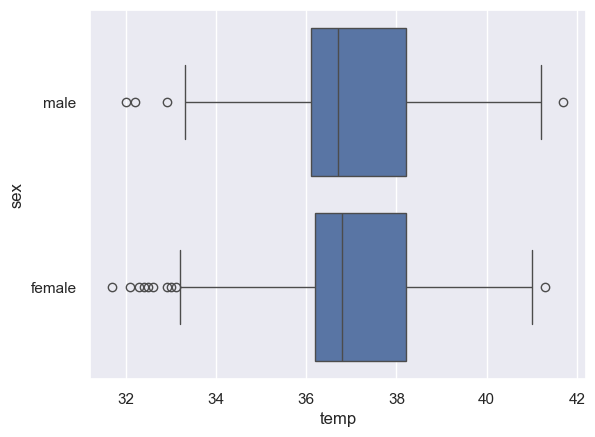

In [48]:
# Crating a simple boxplot to see the outliers 
sns.boxplot(data = df, x = 'temp', y = 'sex')

### Creating multiple outliers for Quantitative data to measure the outliers for each numeric columns 

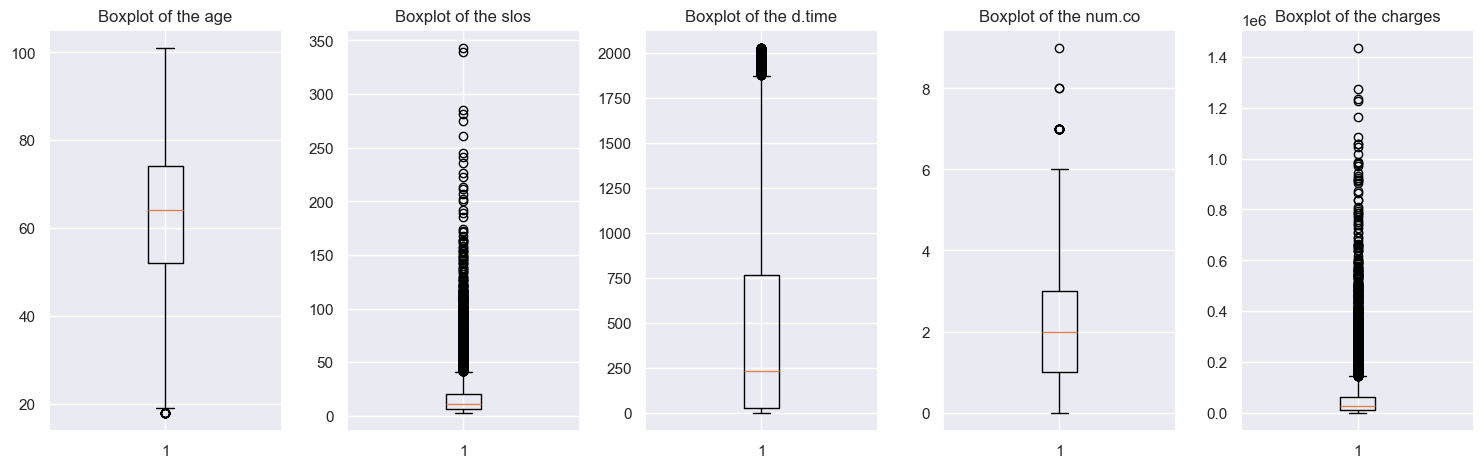

In [49]:
# Creating multiple variables to hold different data

data1 = df['age']
data2 = df['slos']
data3 = df['d.time']
data4 = df['num.co']
data5 = df['charges']

# Creating the subplots 

fig, axs = plt.subplots(1,5, figsize = (15,5))

# Boxplot 1 
axs[0].boxplot(data1);
axs[0].set_title('Boxplot of the age');

# Boxplot 2 
axs[1].boxplot(data2);
axs[1].set_title('Boxplot of the slos');

# Boxplot 3 
axs[2].boxplot(data3);
axs[2].set_title('Boxplot of the d.time');

# Boxplot 4 
axs[3].boxplot(data4);
axs[3].set_title('Boxplot of the num.co');

# Boxplot 5 
axs[4].boxplot(data5);
axs[4].set_title('Boxplot of the charges');

### Adjustments 
plt.tight_layout()


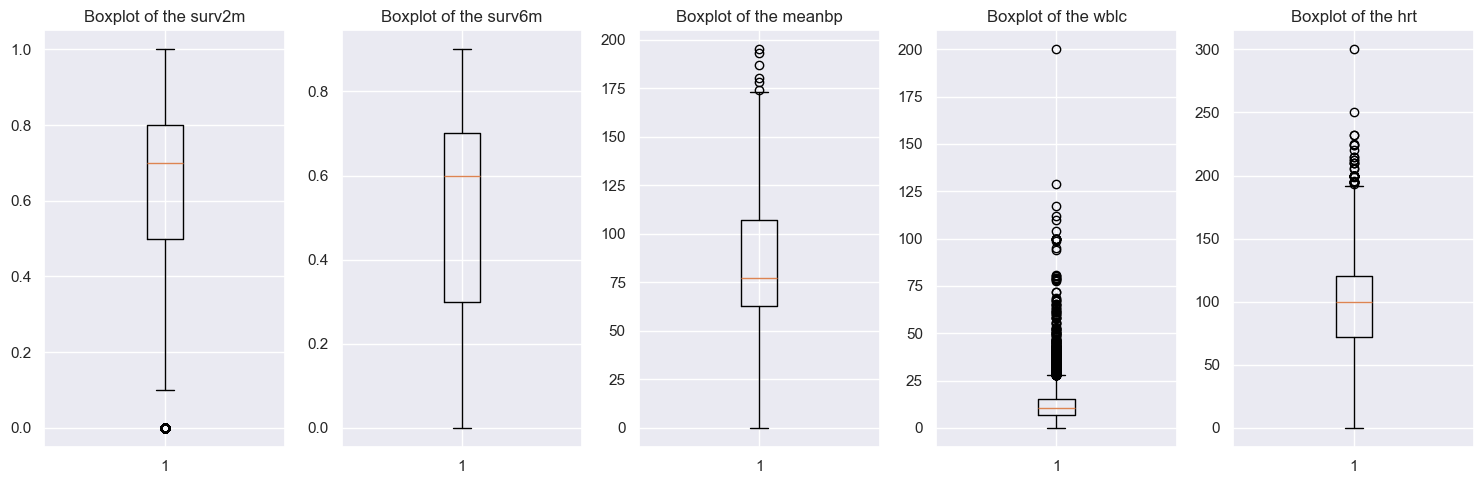

In [50]:
# Creating multiple variables to hold different data

data6 = df['surv2m']
data7 = df['surv6m']
data8 = df['meanbp']
data9 = df['wblc']
data10 = df['hrt']

# Creating the subplots 

fig, axs = plt.subplots(1,5, figsize = (15,5))

# Boxplot 6 
axs[0].boxplot(data6);
axs[0].set_title('Boxplot of the surv2m');

# Boxplot 7
axs[1].boxplot(data7);
axs[1].set_title('Boxplot of the surv6m');

# Boxplot 8 
axs[2].boxplot(data8);
axs[2].set_title('Boxplot of the meanbp');

# Boxplot 9 
axs[3].boxplot(data9);
axs[3].set_title('Boxplot of the wblc');

# Boxplot 10 
axs[4].boxplot(data10);
axs[4].set_title('Boxplot of the hrt');

### Adjustments 
plt.tight_layout()

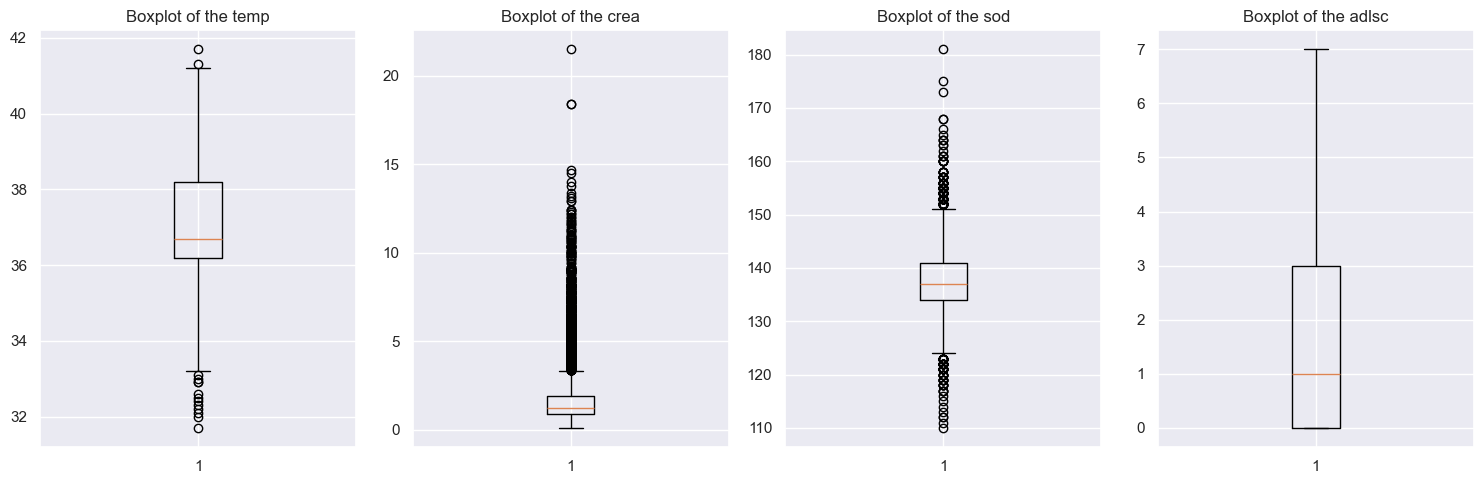

In [51]:
# Creating multiple variables to hold different data

data11 = df['temp']
data12 = df['crea']
data13 = df['sod']
data14 = df['adlsc']


# Creating the subplots 

fig, axs = plt.subplots(1,4, figsize = (15,5))

# Boxplot 11 
axs[0].boxplot(data11);
axs[0].set_title('Boxplot of the temp');

# Boxplot 12 
axs[1].boxplot(data12);
axs[1].set_title('Boxplot of the crea');

# Boxplot 13 
axs[2].boxplot(data13);
axs[2].set_title('Boxplot of the sod');

# Boxplot 14 
axs[3].boxplot(data14);
axs[3].set_title('Boxplot of the adlsc');

### Adjustments 
plt.tight_layout()

### Next I would have to go through every all the box plots that have shown 

I will remove the outliers in the slos as it shows how many days it's been for the patients to be discharged from the day of the study, we can see those who have stayed half a year or less. As for the d.time, there's a considerable amount of patients who have had a follow-up after 1800 days.

In [52]:
print(f'There are {df[df['d.time'] > 2000].shape[0]} hrt outliers in the dataframe')

There are 56 hrt outliers in the dataframe


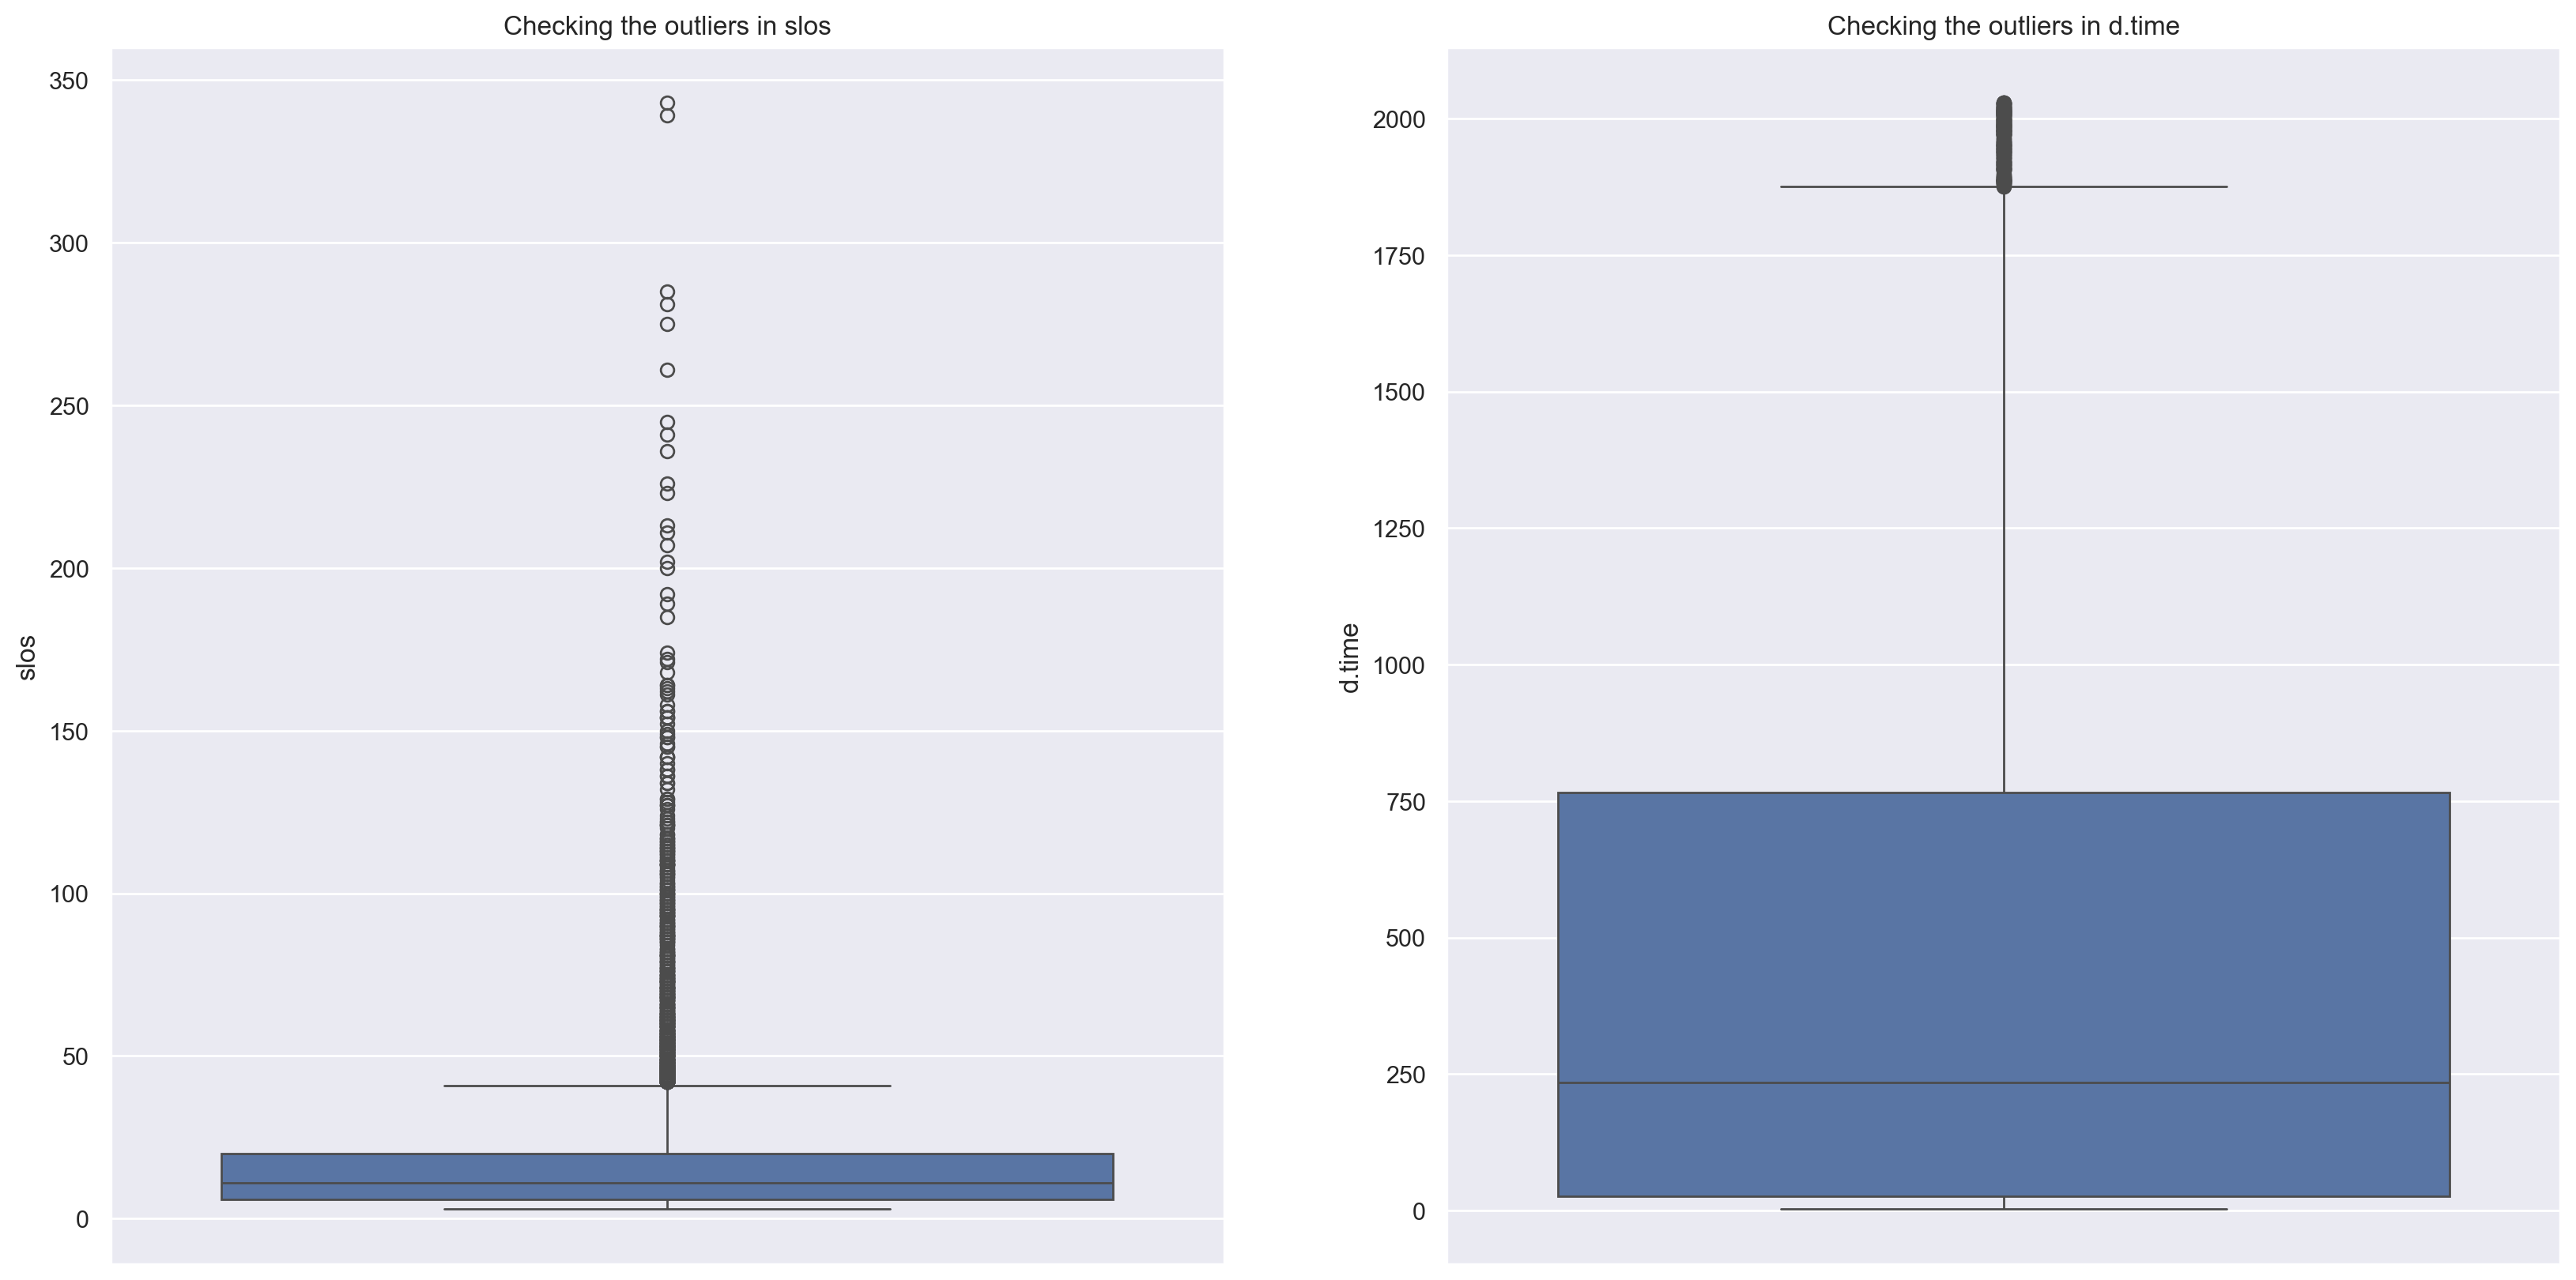

In [53]:
plt.figure(figsize = (20,10), dpi = 200);

plt.subplot(1,2,1)
sns.boxplot(data = df['slos']);
plt.title('Checking the outliers in slos');

plt.subplot(1,2,2)
sns.boxplot(data = df['d.time']);
plt.title('Checking the outliers in d.time');

I will remove the outliers in the num.co as it show's the number of diagnosis in the patients, we can only focus on those with less than 6 diagnosis. As for the charges, there's a condsiderable amount of patients we will remove charges over the 500k mark. 

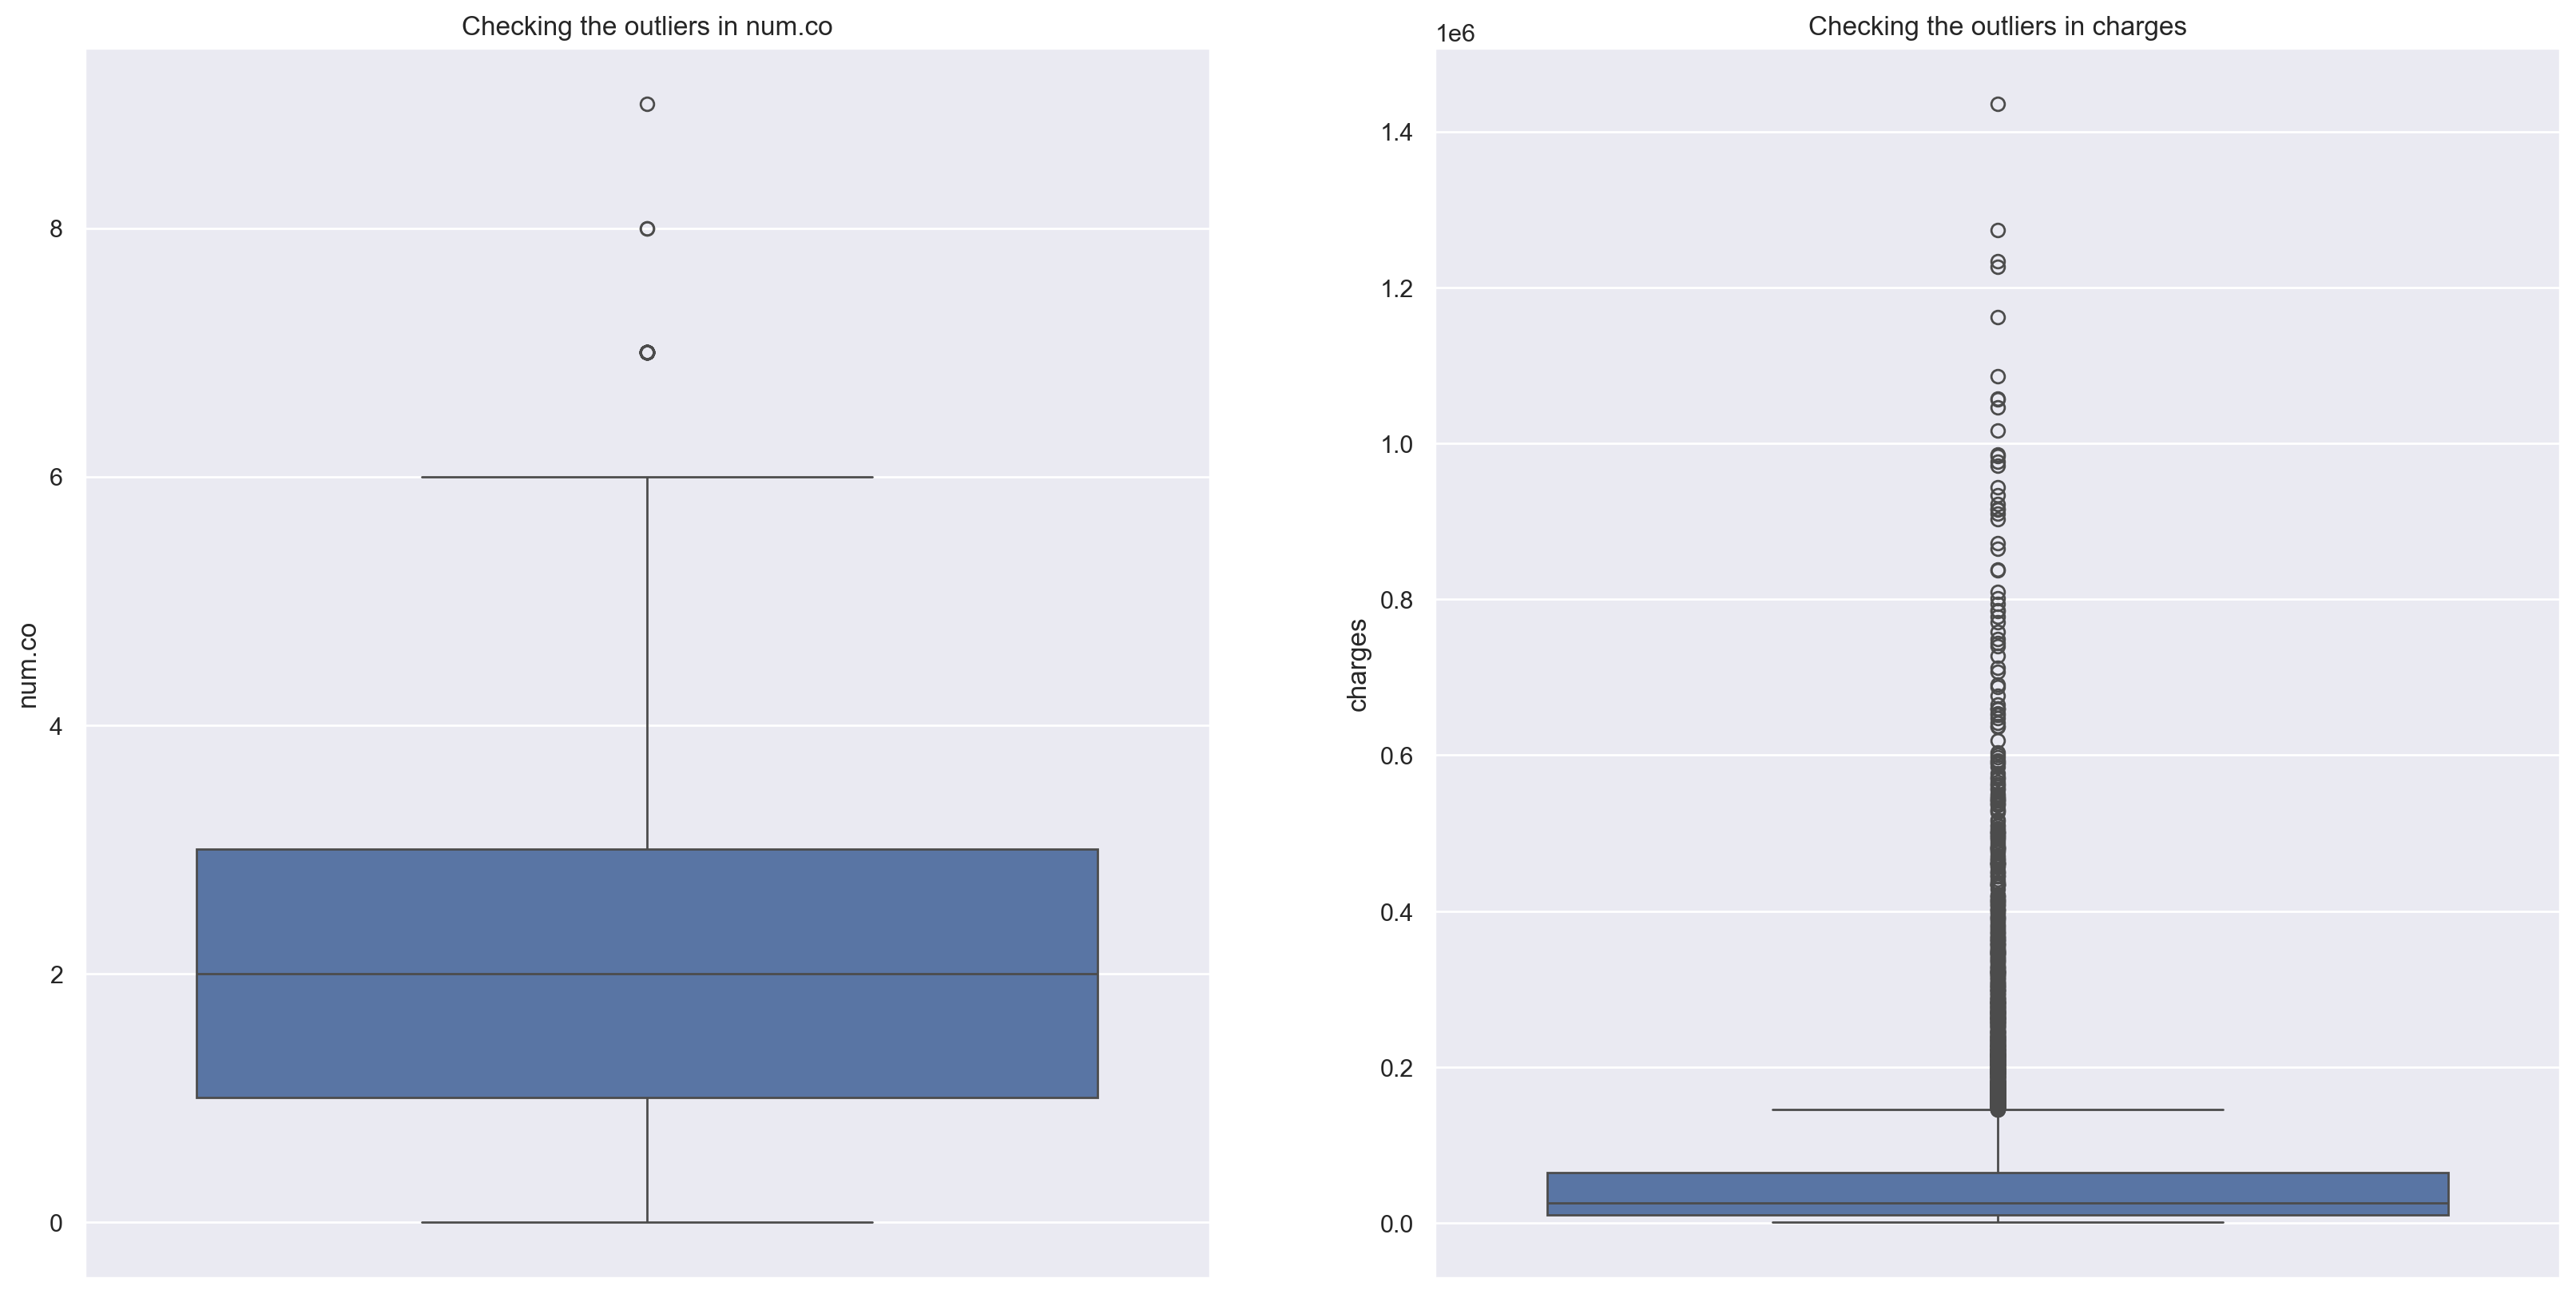

In [54]:
plt.figure(figsize = (20,10), dpi = 200);

plt.subplot(1,2,1)
sns.boxplot(data = df['num.co']);
plt.title('Checking the outliers in num.co');

plt.subplot(1,2,2)
sns.boxplot(data = df['charges']);
plt.title('Checking the outliers in charges');

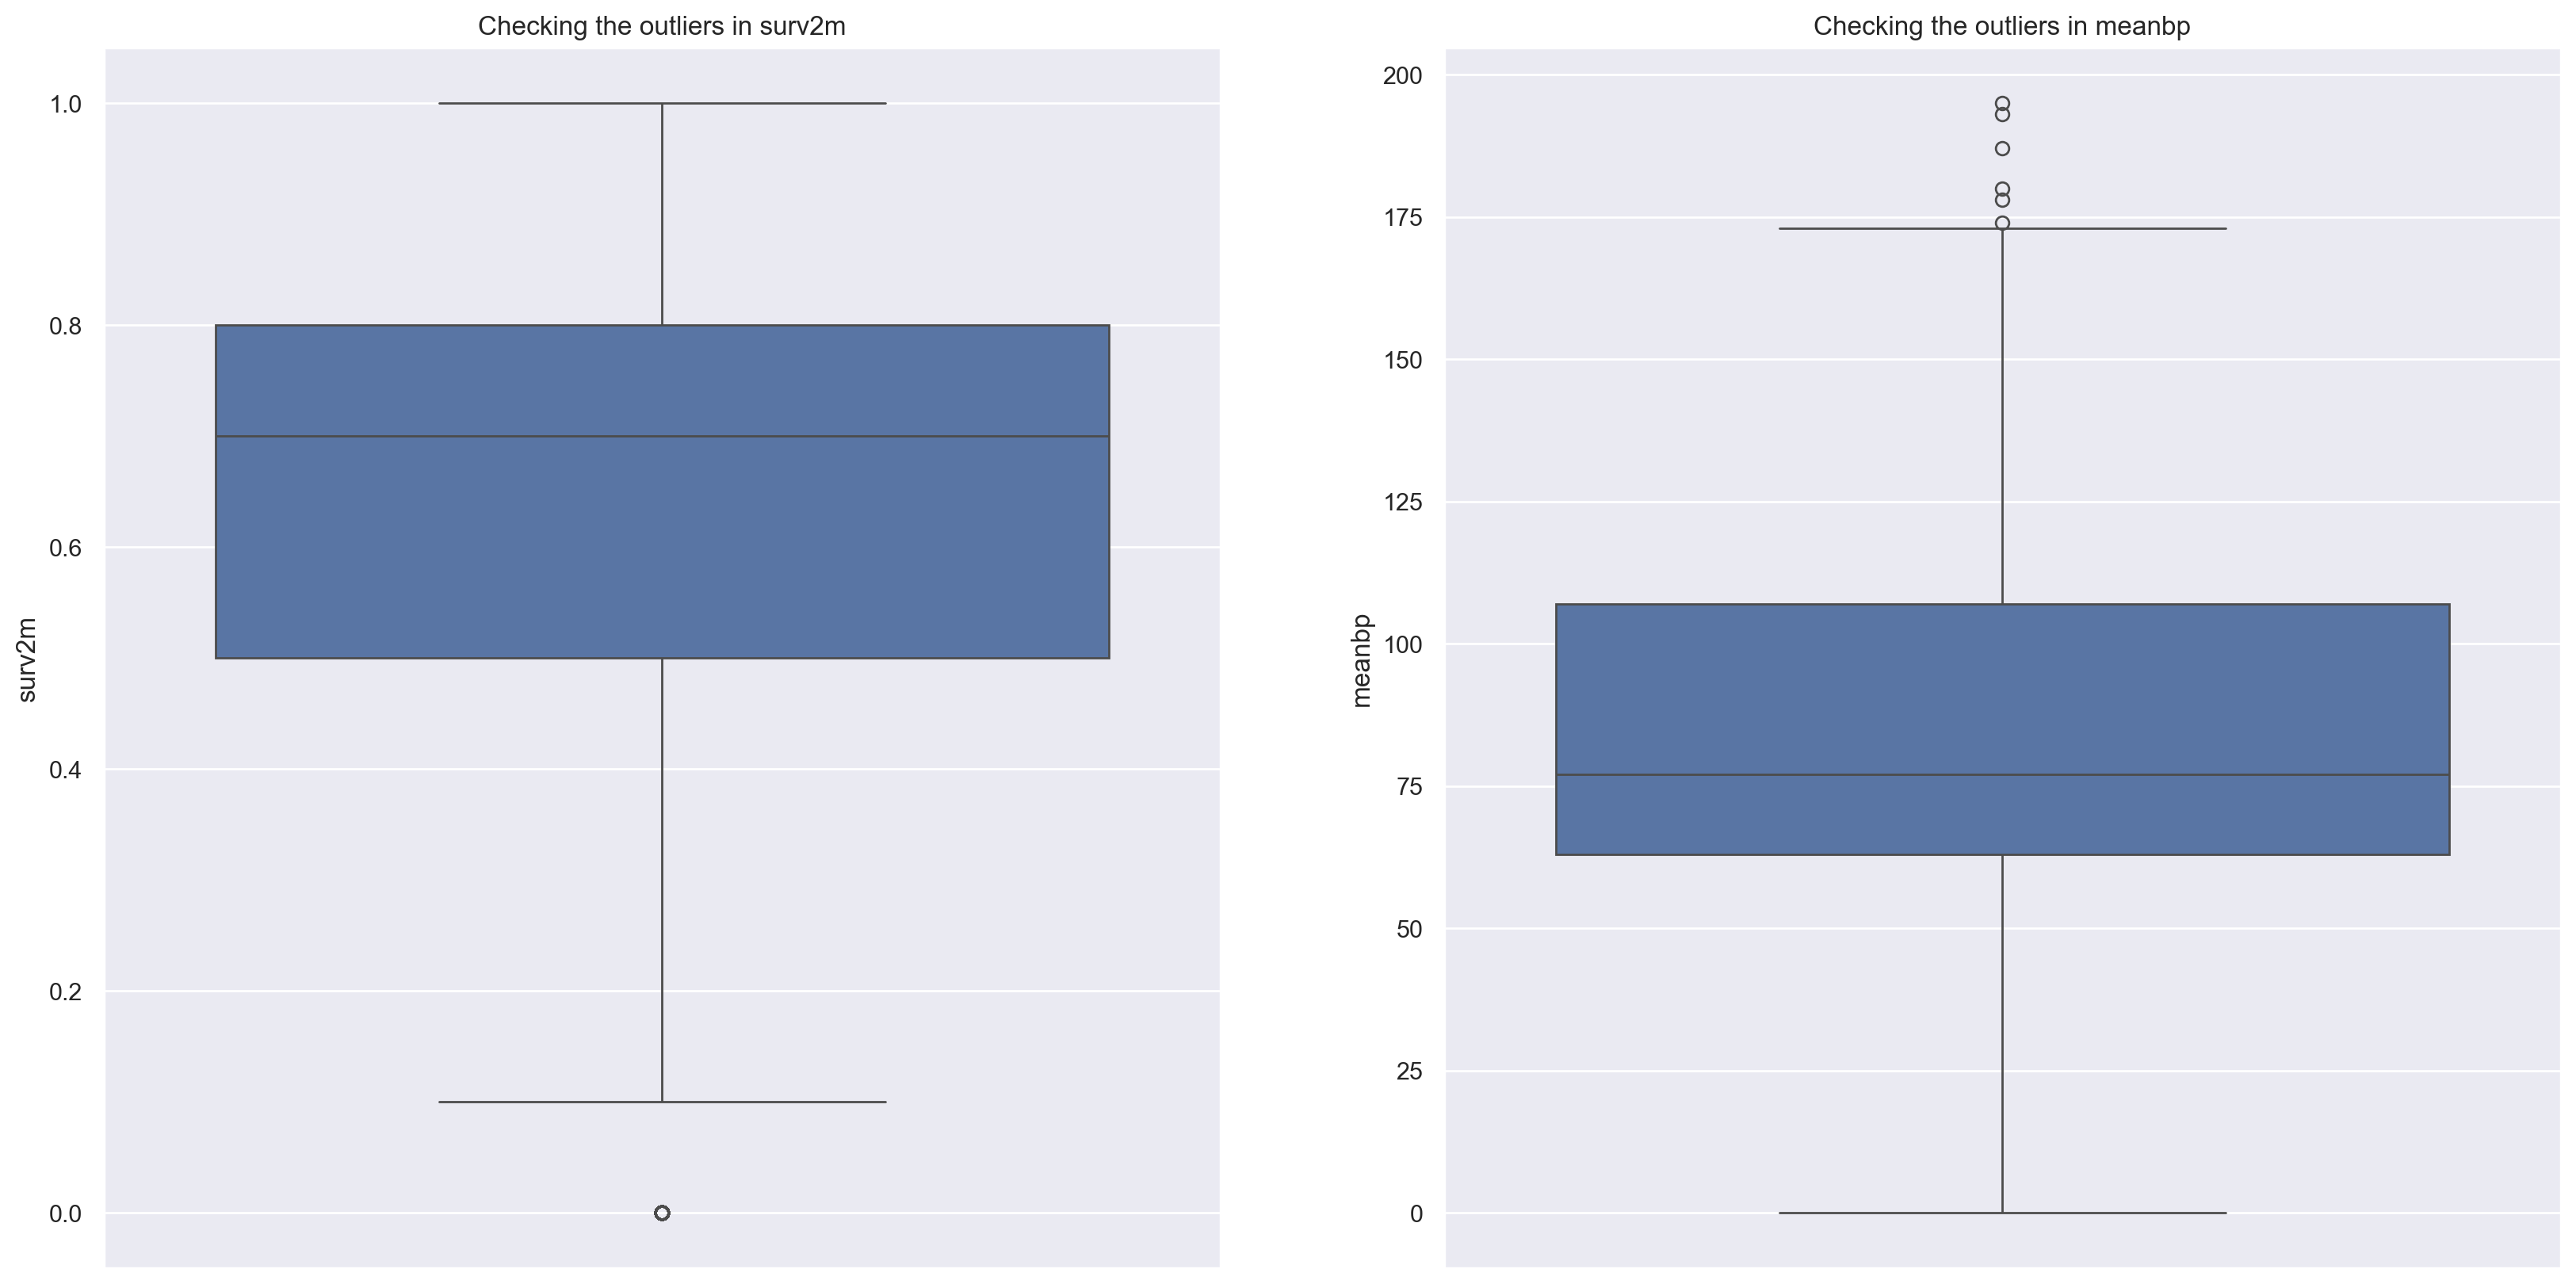

In [55]:
plt.figure(figsize = (20,10), dpi = 200);

plt.subplot(1,2,1)
sns.boxplot(data = df['surv2m']);
plt.title('Checking the outliers in surv2m');

plt.subplot(1,2,2)
sns.boxplot(data = df['meanbp']);
plt.title('Checking the outliers in meanbp');

Wblc and hrt outliers 

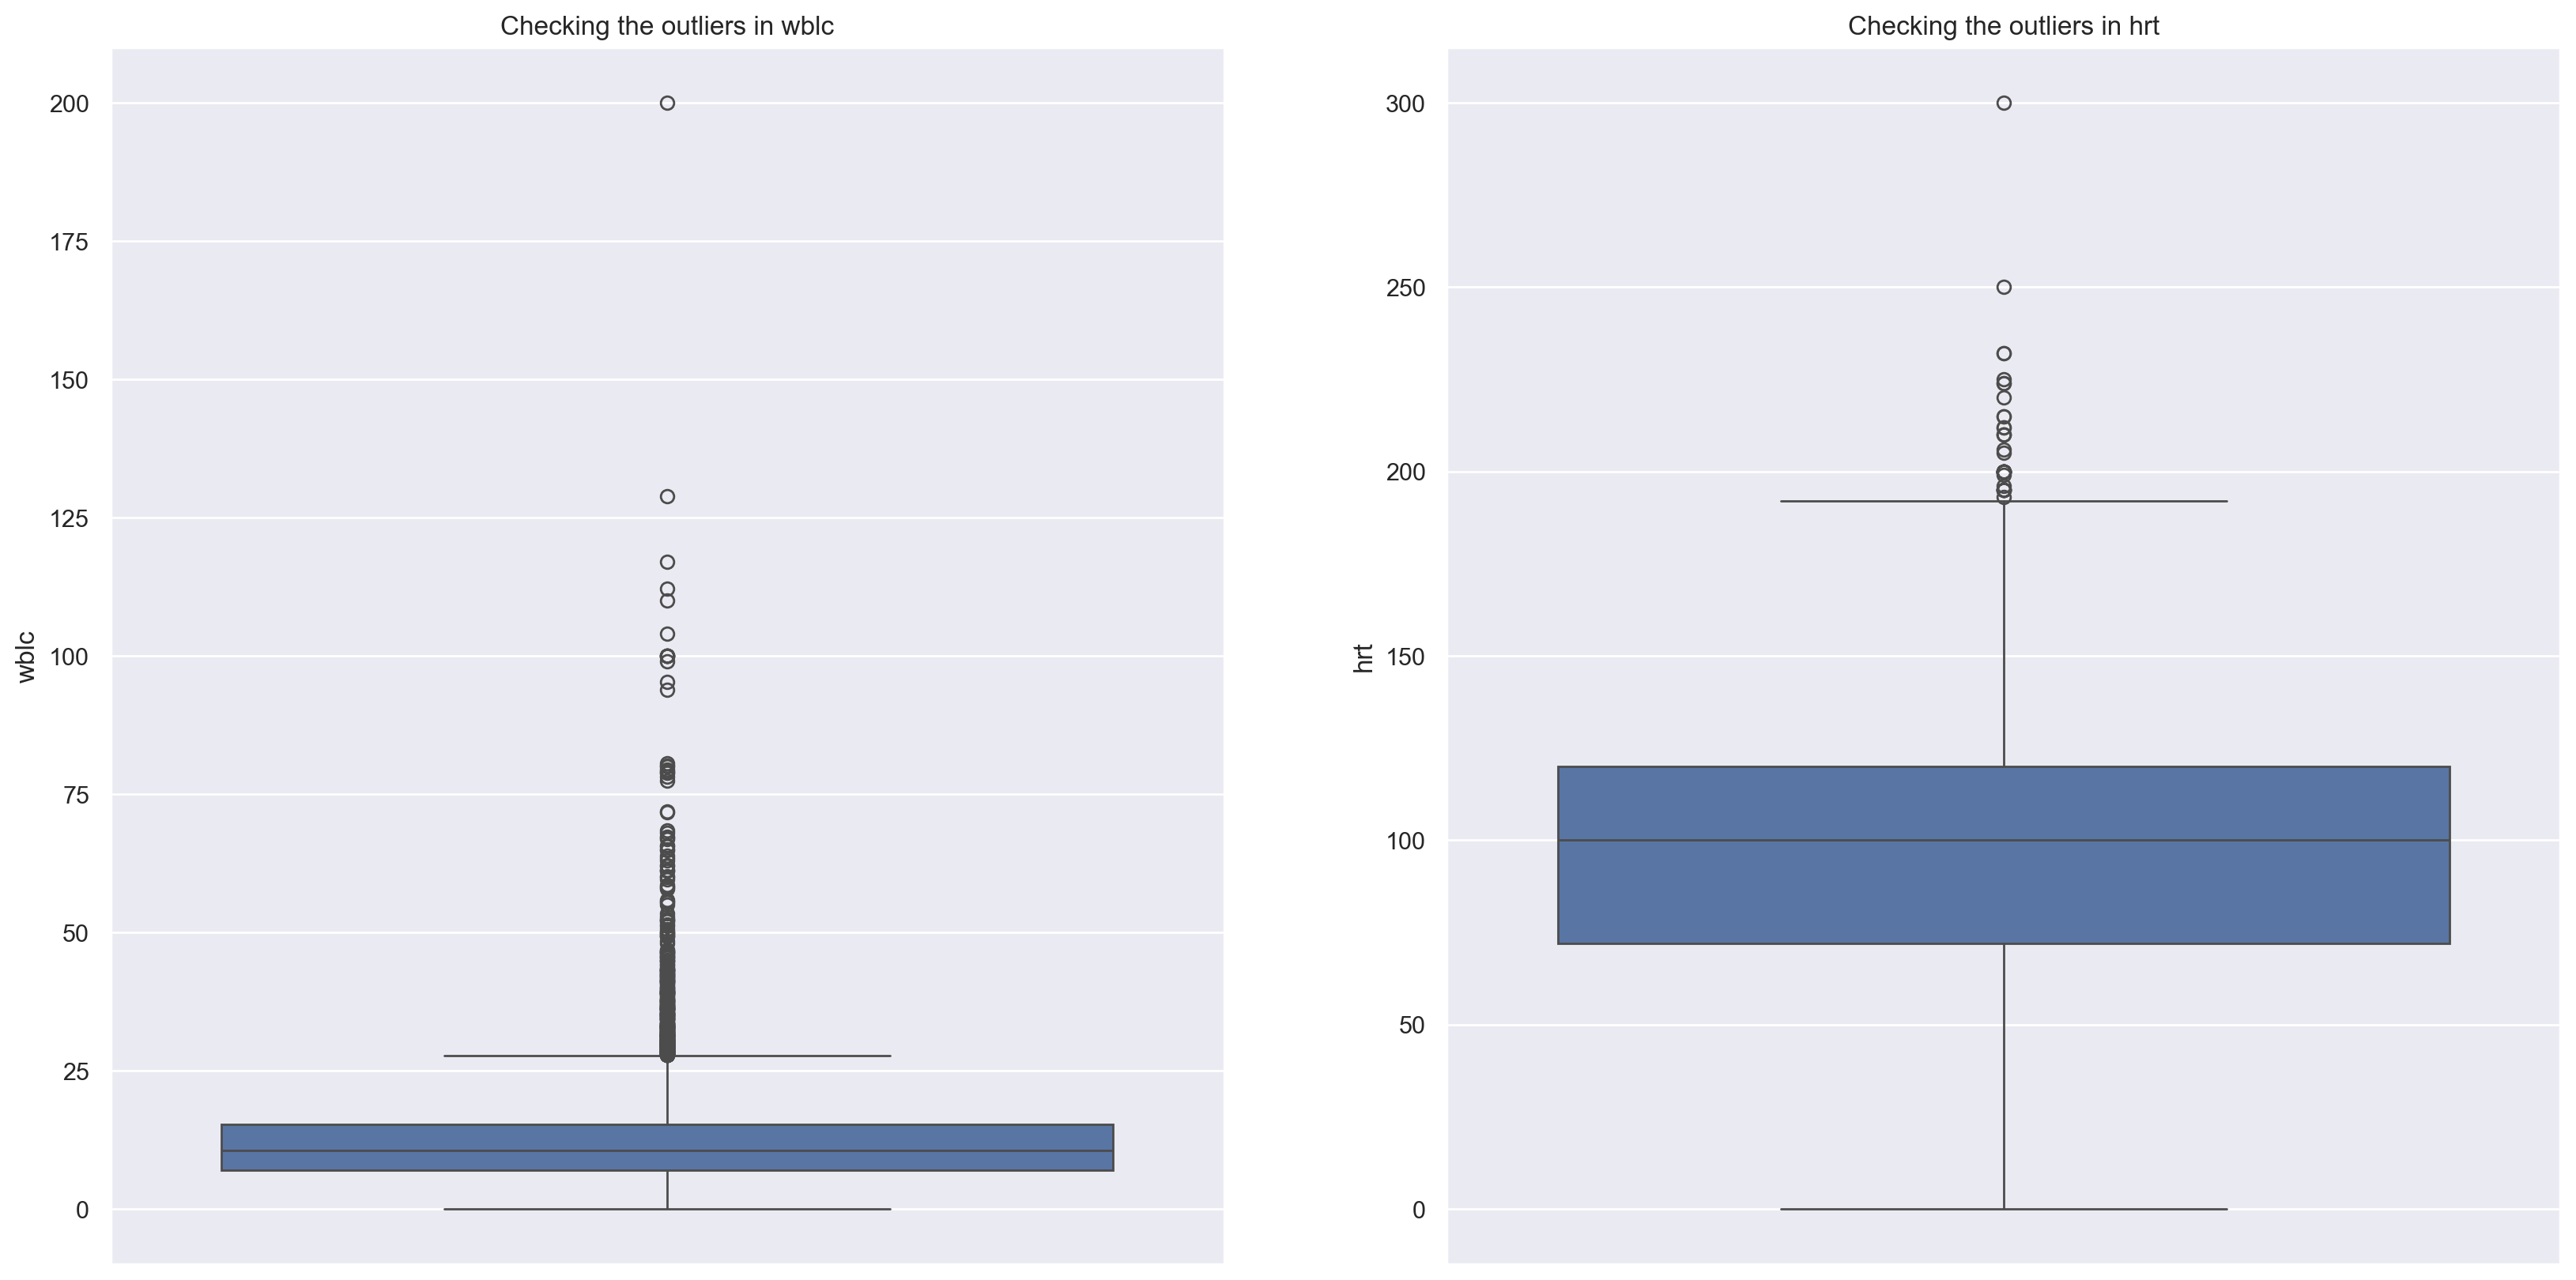

In [56]:
plt.figure(figsize = (20,10), dpi = 200);

plt.subplot(1,2,1)
sns.boxplot(data = df['wblc']);
plt.title('Checking the outliers in wblc');

plt.subplot(1,2,2)
sns.boxplot(data = df['hrt']);
plt.title('Checking the outliers in hrt');

Temp and Crea 

In [57]:
print(f'There are {df[df['crea'] > 6].shape[0]} crea outliers in the dataframe')

There are 322 crea outliers in the dataframe


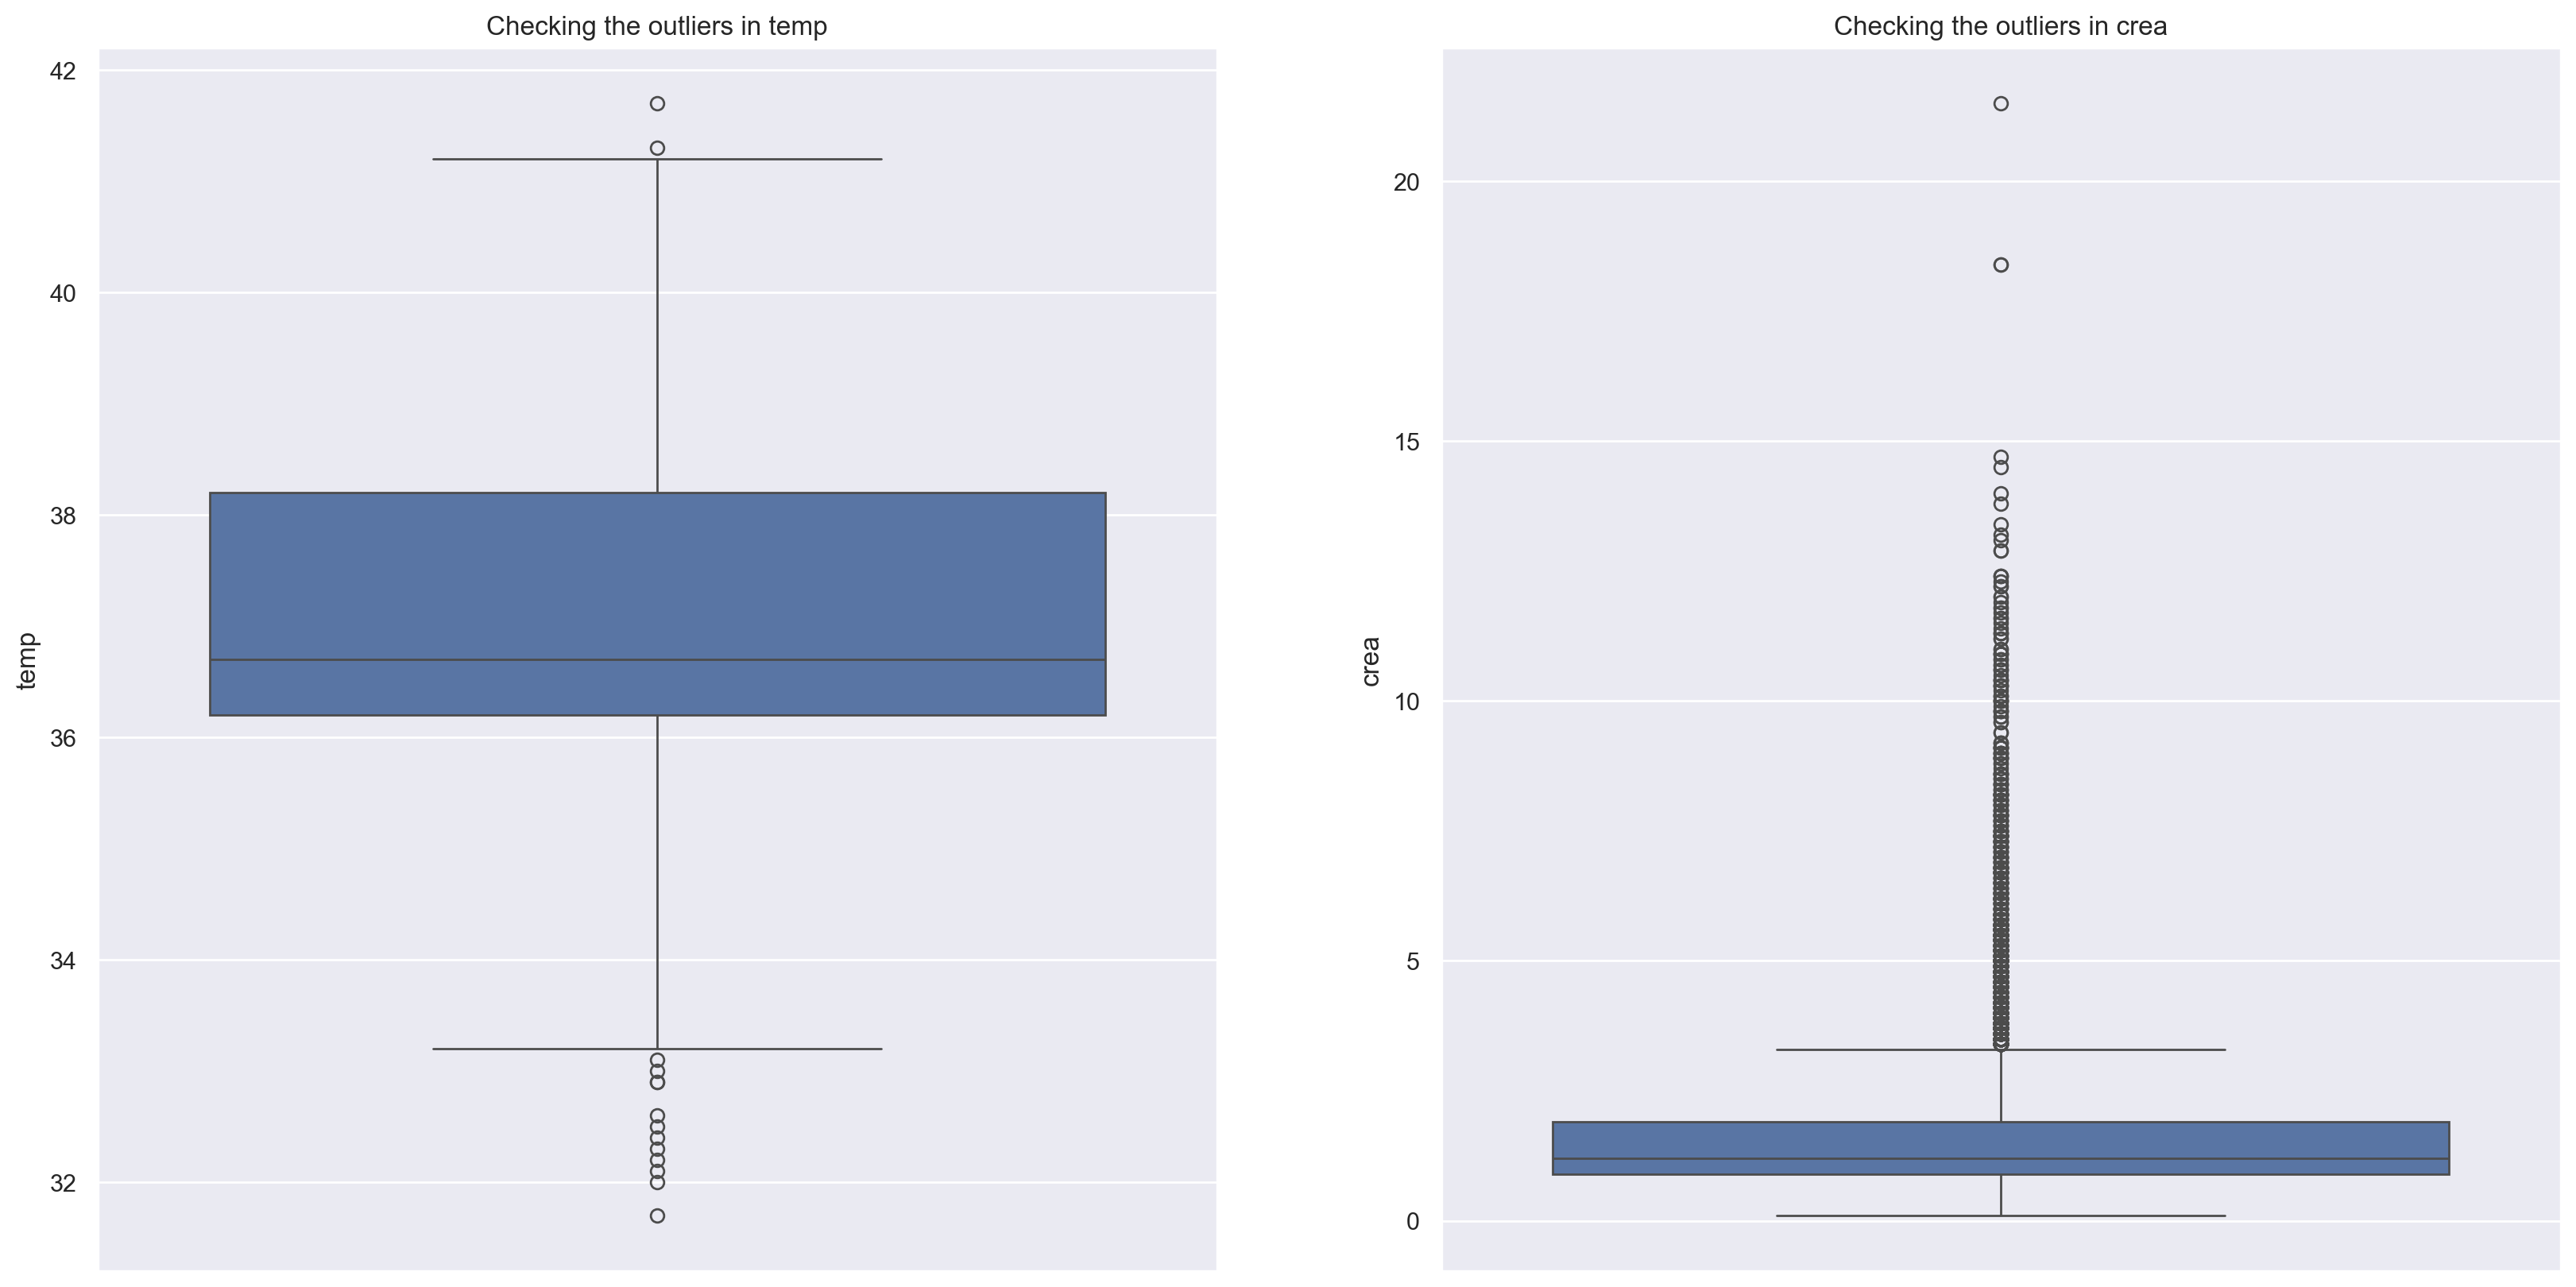

In [58]:
plt.figure(figsize = (20,10), dpi = 200);

plt.subplot(1,2,1)
sns.boxplot(data = df['temp']);
plt.title('Checking the outliers in temp');

plt.subplot(1,2,2)
sns.boxplot(data = df['crea']);
plt.title('Checking the outliers in crea');

Sod Outliers 

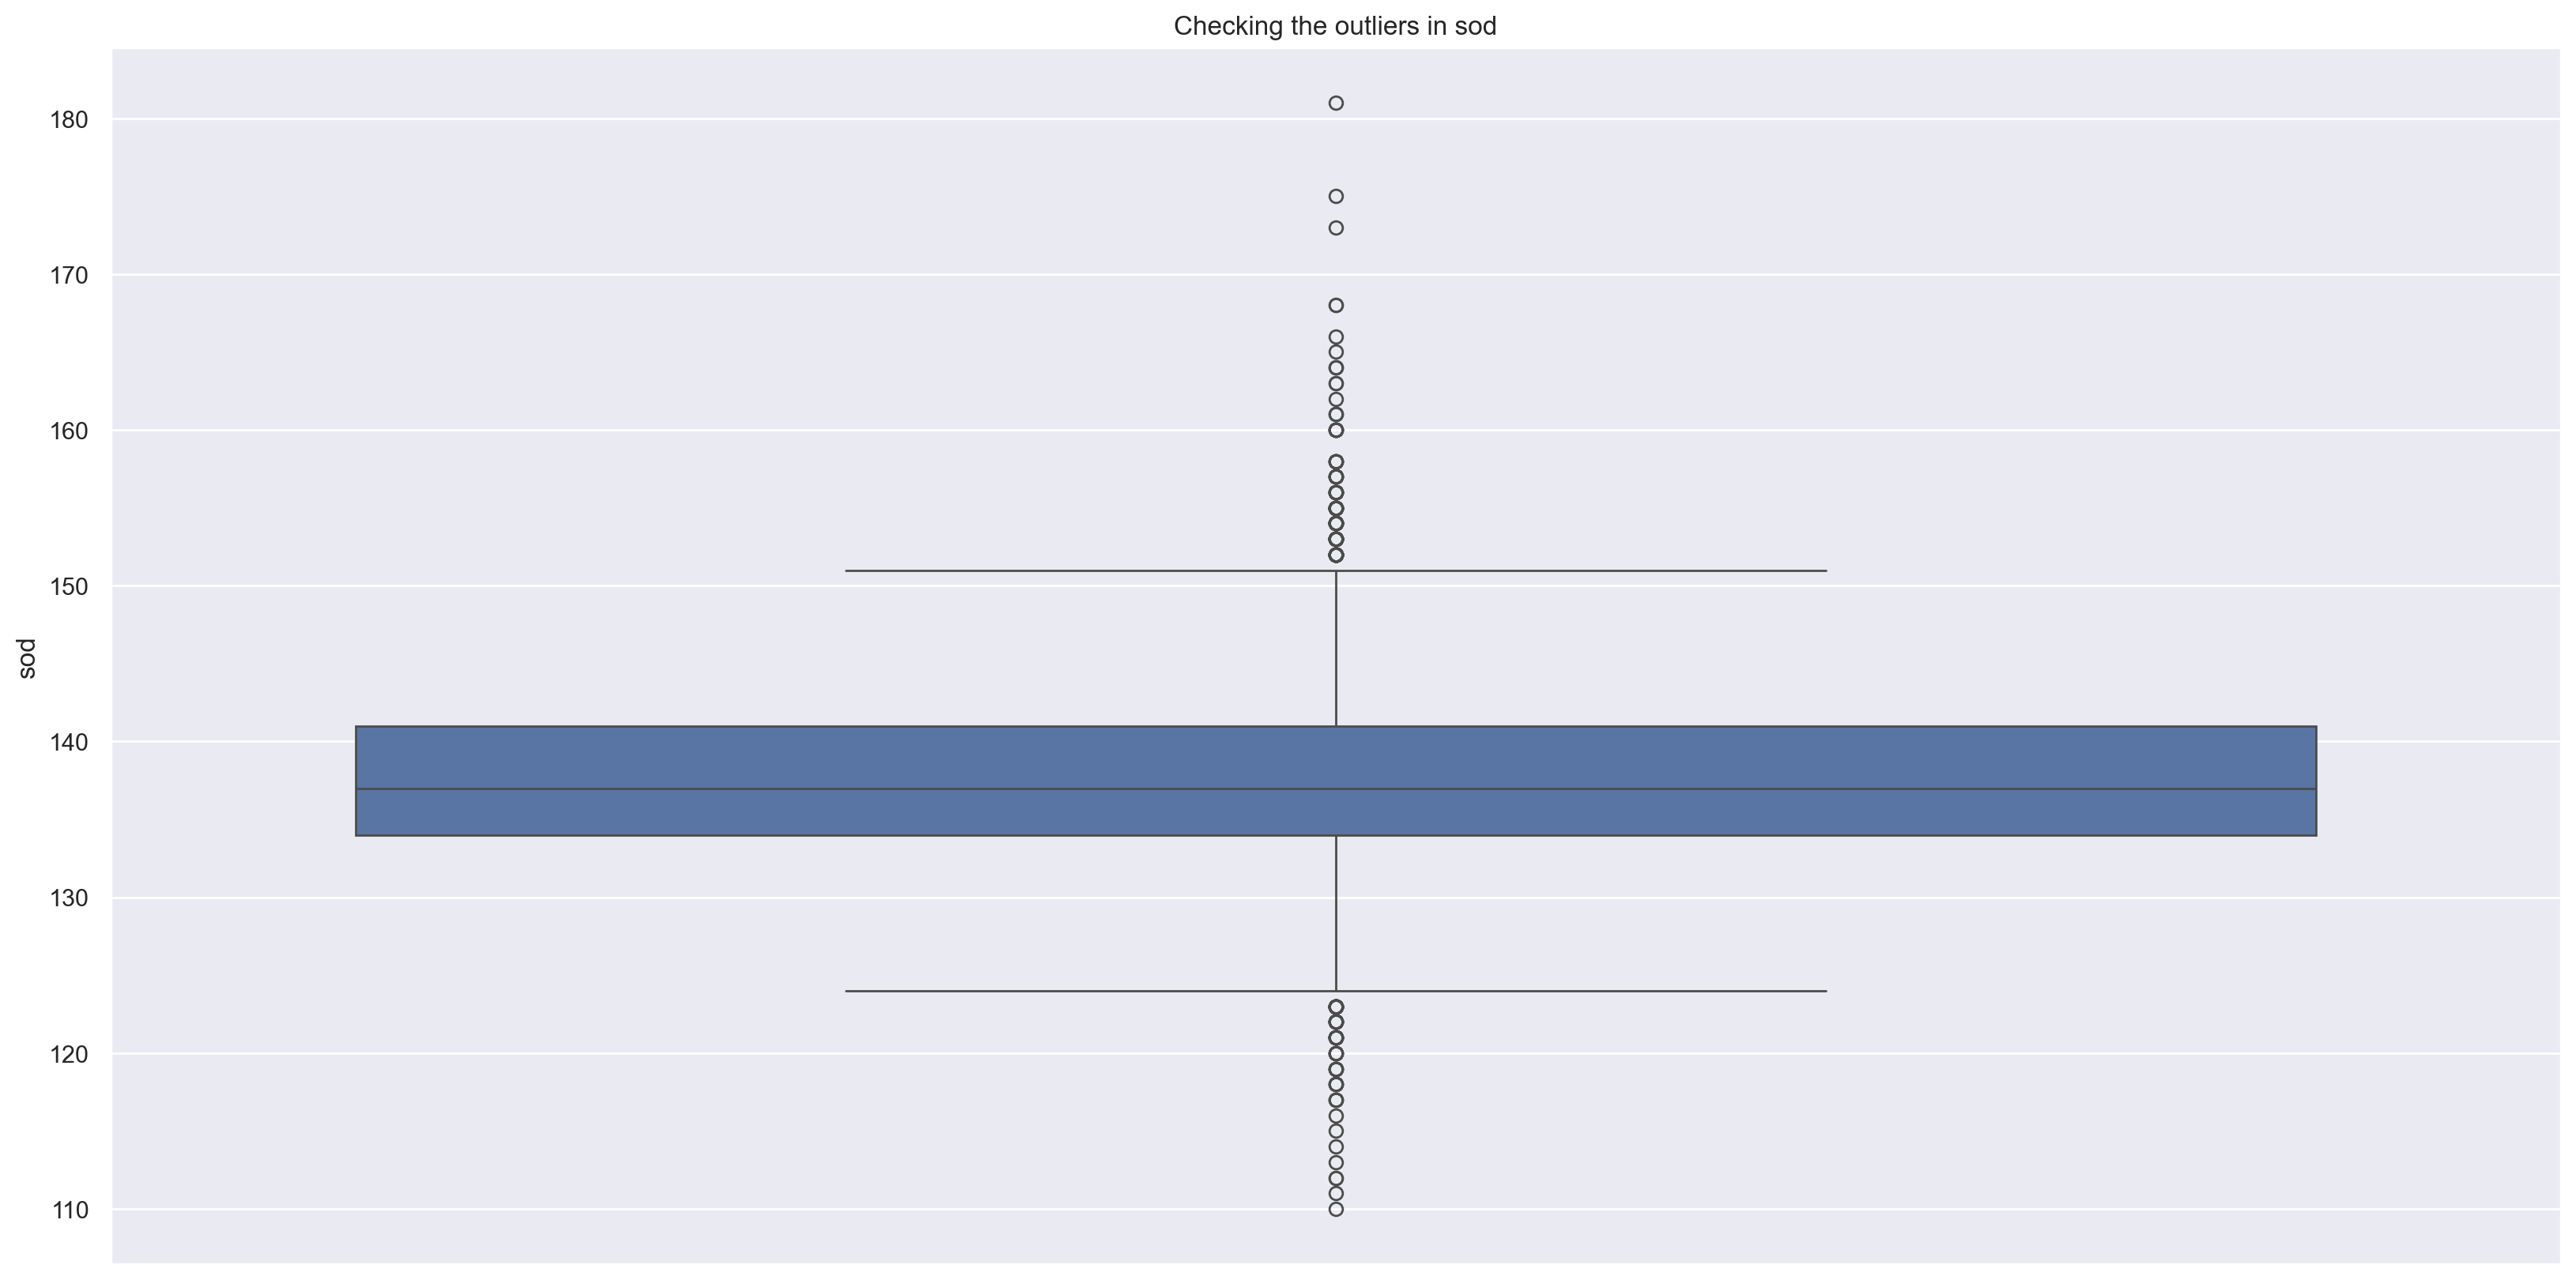

In [59]:
plt.figure(figsize = (20,10), dpi = 200);


sns.boxplot(data = df['sod']);
plt.title('Checking the outliers in sod');


### Finalising value range to delete from each outliers 

In [60]:
print('There are',df[df['slos'] > 180].shape[0],'outliers to be removed from the data frame')

There are 19 outliers to be removed from the data frame


In [61]:
print('There are',df[df['d.time'] > 2000].shape[0],'outliers to be removed from the data frame')

There are 56 outliers to be removed from the data frame


In [62]:
print('There are',df[df['charges'] > 500000].shape[0],'outliers to be removed from the data frame')

There are 98 outliers to be removed from the data frame


In [63]:
print('There are',df[df['wblc'] > 70].shape[0],'outliers to be removed from the data frame')

There are 26 outliers to be removed from the data frame


In [64]:
print('There are',df[df['hrt'] > 190].shape[0],'outliers to be removed from the data frame')

There are 41 outliers to be removed from the data frame


In [65]:
print('There are',df[df['temp'] < 33].shape[0],'outliers to be removed from the data frame')

There are 10 outliers to be removed from the data frame


In [66]:
print('There are',df[df['temp'] > 40].shape[0],'outliers to be removed from the data frame')

There are 66 outliers to be removed from the data frame


In [67]:
print('There are',df[df['crea'] > 6].shape[0],'outliers to be removed from the data frame')

There are 322 outliers to be removed from the data frame


### Deleting all the outliers using the drop() function 

In [68]:
df = df.drop(df[df['slos'] > 180].index)

In [69]:
df = df.drop(df[df['d.time'] > 2000].index)

In [70]:
df = df.drop(df[df['charges'] > 500000].index)

In [71]:
df = df.drop(df[df['wblc'] > 70].index)

In [72]:
df = df.drop(df[df['hrt'] > 190].index)

In [73]:
df = df.drop(df[df['temp'] < 33].index)

In [74]:
df = df.drop(df[df['temp'] > 40].index)

In [75]:
df = df.drop(df[df['crea'] > 6].index)

In [76]:
print(f'As you can see the data frame has gone from 8802, to {df.shape[0]}')

As you can see the data frame has gone from 8802, to 8191


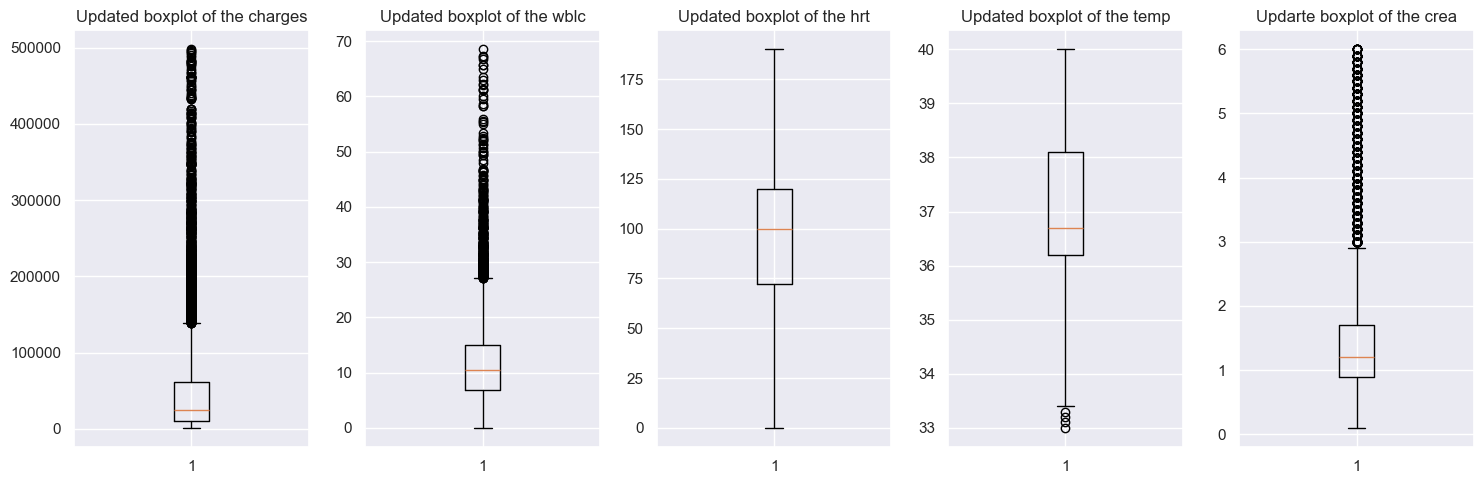

In [77]:
data1done = df['charges']
data2done = df['wblc']
data3done = df['hrt']
data4done = df['temp']
data5done = df['crea']

# Creating the subplots 

fig, axs = plt.subplots(1,5, figsize = (15,5))

# Updated boxplot 1 
axs[0].boxplot(data1done);
axs[0].set_title('Updated boxplot of the charges');

# Updated boxplot 2
axs[1].boxplot(data2done);
axs[1].set_title('Updated boxplot of the wblc');

# Updated boxplot 3 
axs[2].boxplot(data3done);
axs[2].set_title('Updated boxplot of the hrt');

# Updated boxplot 4 
axs[3].boxplot(data4done);
axs[3].set_title('Updated boxplot of the temp');

# Updated boxplot 5 
axs[4].boxplot(data5done);
axs[4].set_title('Updarte boxplot of the crea');

### Adjustments 
plt.tight_layout()

As you can see all the boxplots displayed have had all or some outliers removed for the data frame. 

## EDA 

### 1) What is the number of deaths per sex?

In [78]:
## Using the groupby function to check the total amount of deaths in each sex

genderdeath_df = df[df['death'] == 1].groupby('sex').size()

genderalive_df = df[df['death'] == 0].groupby('sex').size()

In [79]:
print('The number of patient deaths per sex:\n', genderdeath_df)

The number of patient deaths per sex:
 sex
female    2384
male      3212
dtype: int64


In [80]:
print('The number of patients alive per sex:\n', genderalive_df)

The number of patients alive per sex:
 sex
female    1200
male      1395
dtype: int64


#### Creating a count plot to see the number of deaths per gender

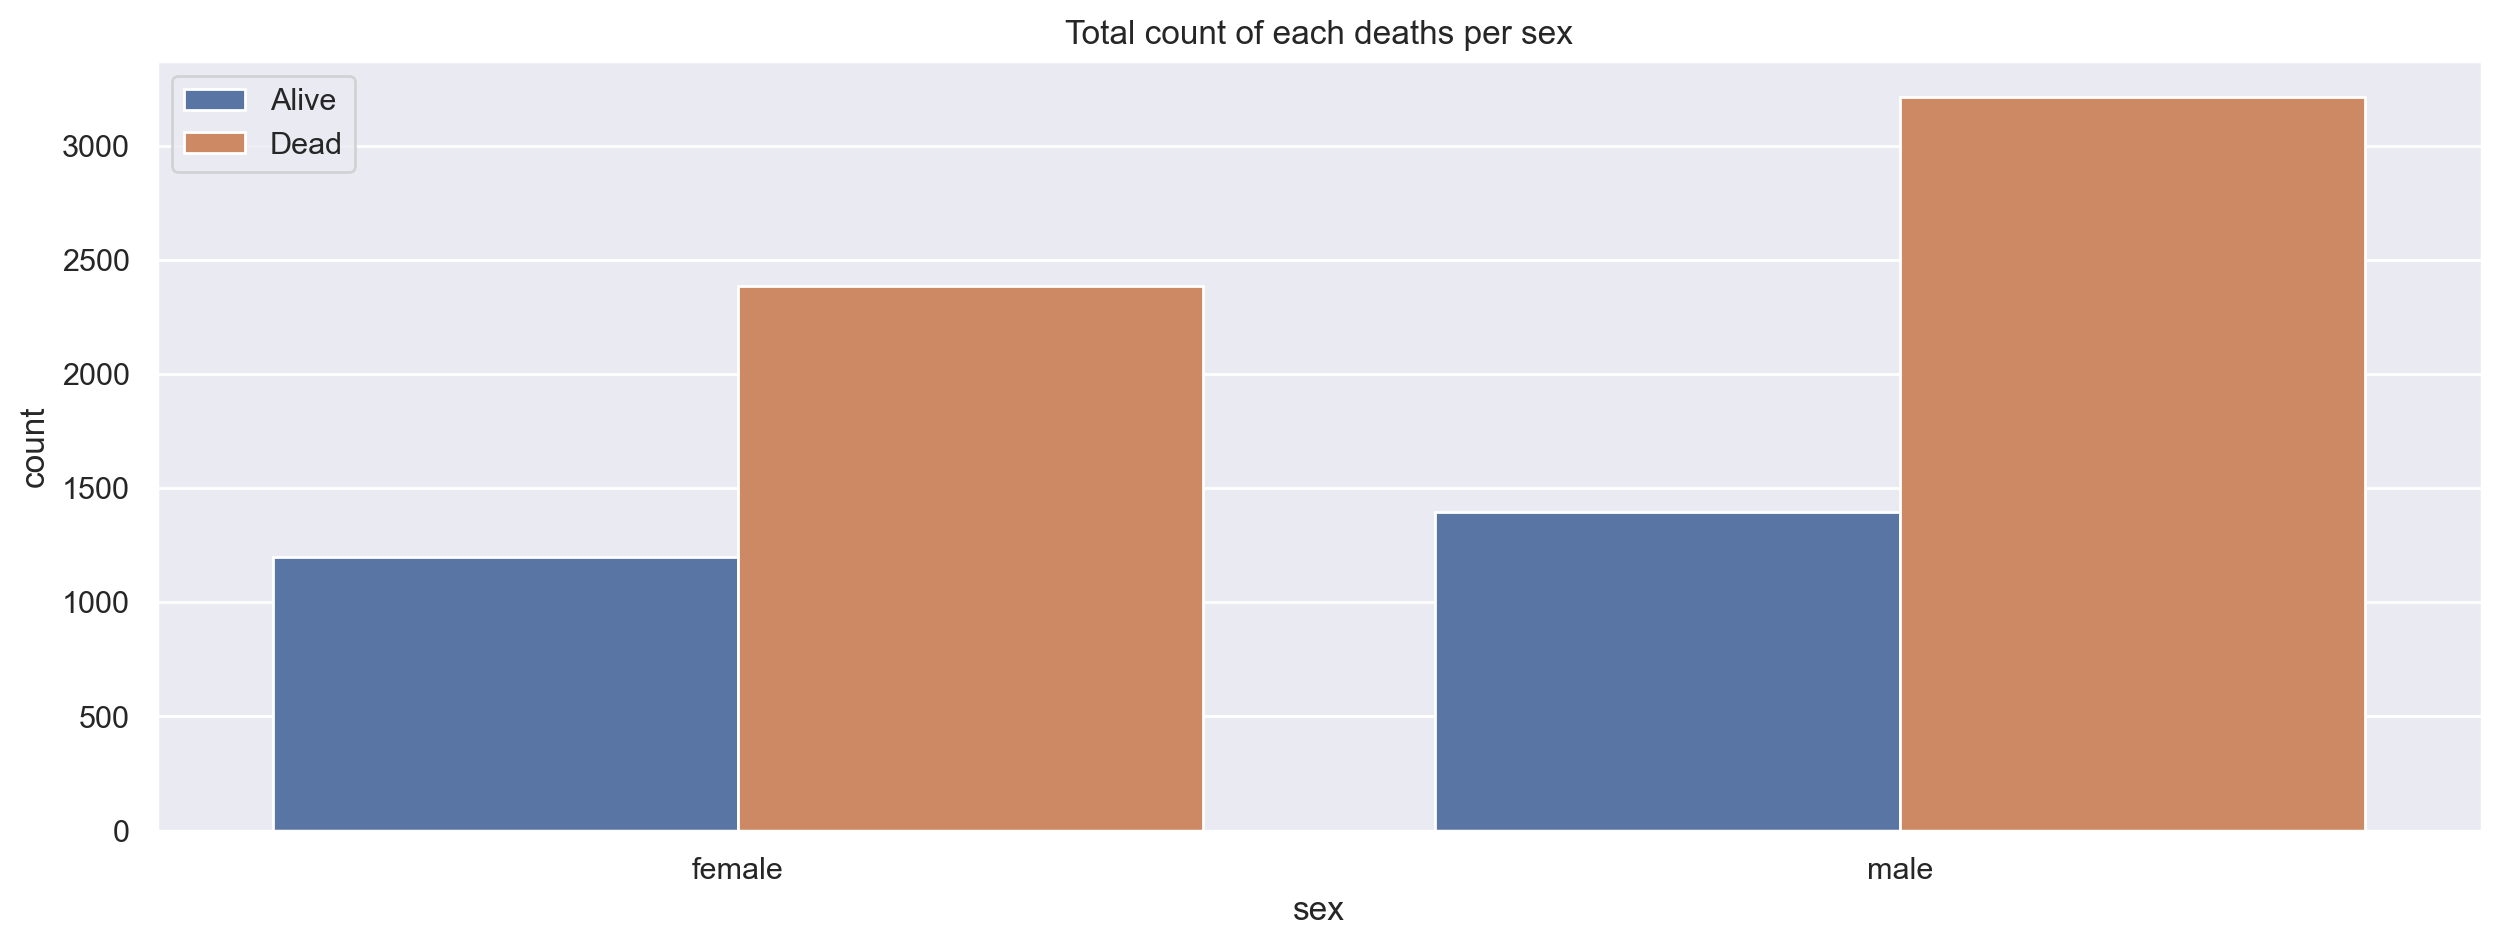

In [81]:
plt.figure(figsize = (15,5), dpi = 200);

sns.countplot(df, x = 'sex', hue = 'death');
plt.title('Total count of each deaths per sex');
plt.legend(labels = ['Alive', 'Dead']);

The graph highlights the number of deaths is significantly higher than those who are alive, particularly males have the highest death rates

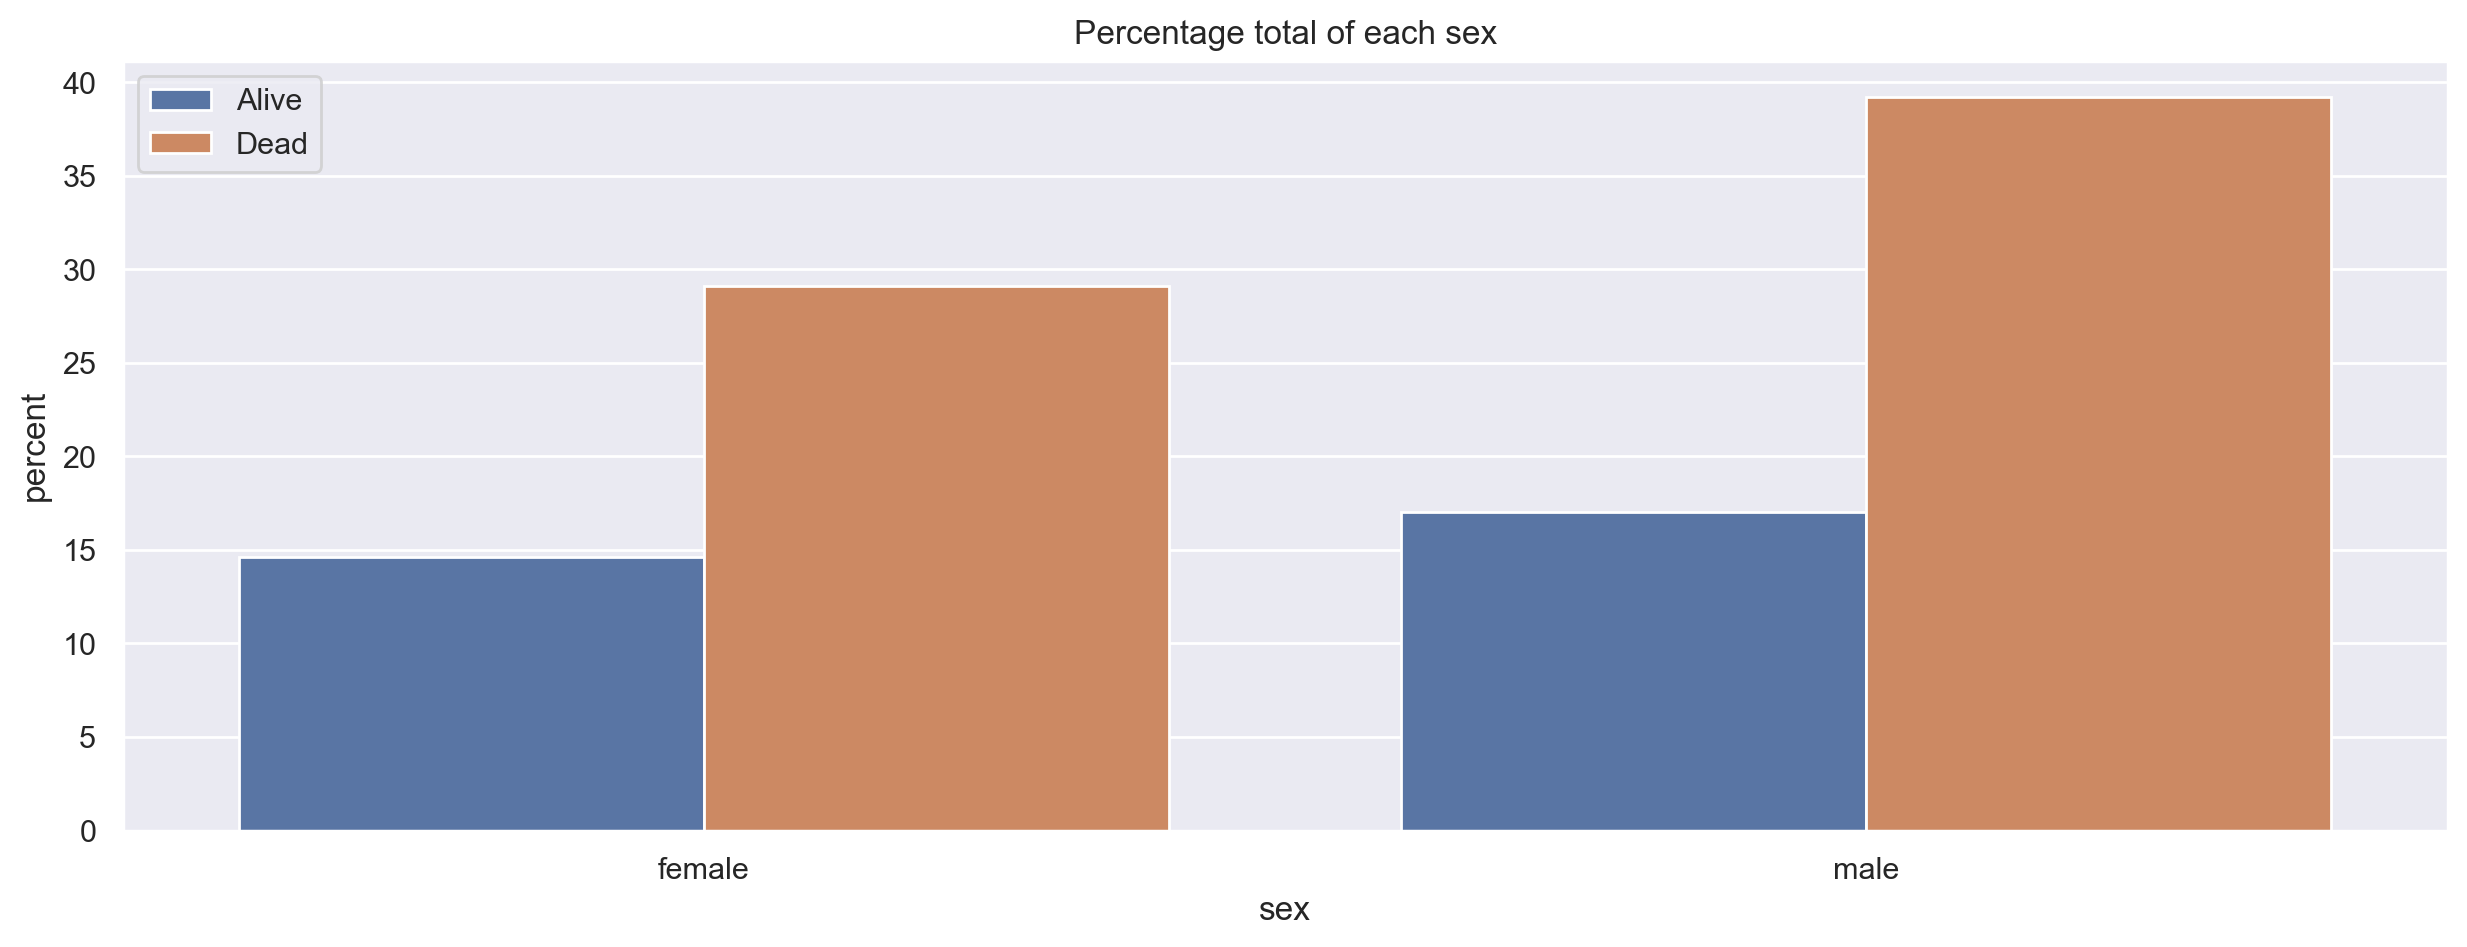

In [82]:
plt.figure(figsize = (15,5), dpi = 200);

sns.countplot(df, x = 'sex', hue = 'death', stat='percent');
plt.title('Percentage total of each sex');
plt.legend(labels = ['Alive', 'Dead']);

40% of deaths are males, and 30% are females, which shows that men are more likely to die from their diagnosis. In contrast to the patient who are alive is a lot lower for both men and women

### 2) Look into the number of different illnesses by race

In [83]:
df['dzgroup'].value_counts()

dzgroup
ARF/MOSF w/Sepsis    3087
CHF                  1282
COPD                  900
Lung Cancer           829
MOSF w/Malig          629
Coma                  524
Cirrhosis             474
Colon Cancer          466
Name: count, dtype: int64

Using the value_count() function, we can see the amount of conditions that the patients have been diagnosed with. Next, we will explore the number of illnesses per race. 

Below is the list of each disease found in the data frame and it's description. 

- ARF/MOSF w/Sepsis (Acute Respiratory failure) - A condition where there's not enough oxygen or too much carbon dioxide in the body.
- CHF (Congestive Heart Failure) - is a long-term condition where the heart can't pump enough blood to supply the body. 
- COPD (Chronic Obstructive Pulmonary Disease) - This is a lung or airway disease that restricts the patient's breathing.
- Lung Cancer 
- MOSF w/Malig (Multiple organ system failure with malignancy) - MOSF occurs in critically ill patients with Cancer with two or more failed organ system 
- Coma - Prolonged state of consciousness caused by a variety of reasons such as head injury, stroke, brain tumour or illness like diabetes
- Colon Cancer - A type of Cancer that forms in the Colon  
- Cirrhosis - is a permanent scarring that damages the liver

In [84]:
### Using the value count to see the number of patients race

df['race'].value_counts()

race
white       6510
black       1260
hispanic     250
other        101
asian         70
Name: count, dtype: int64

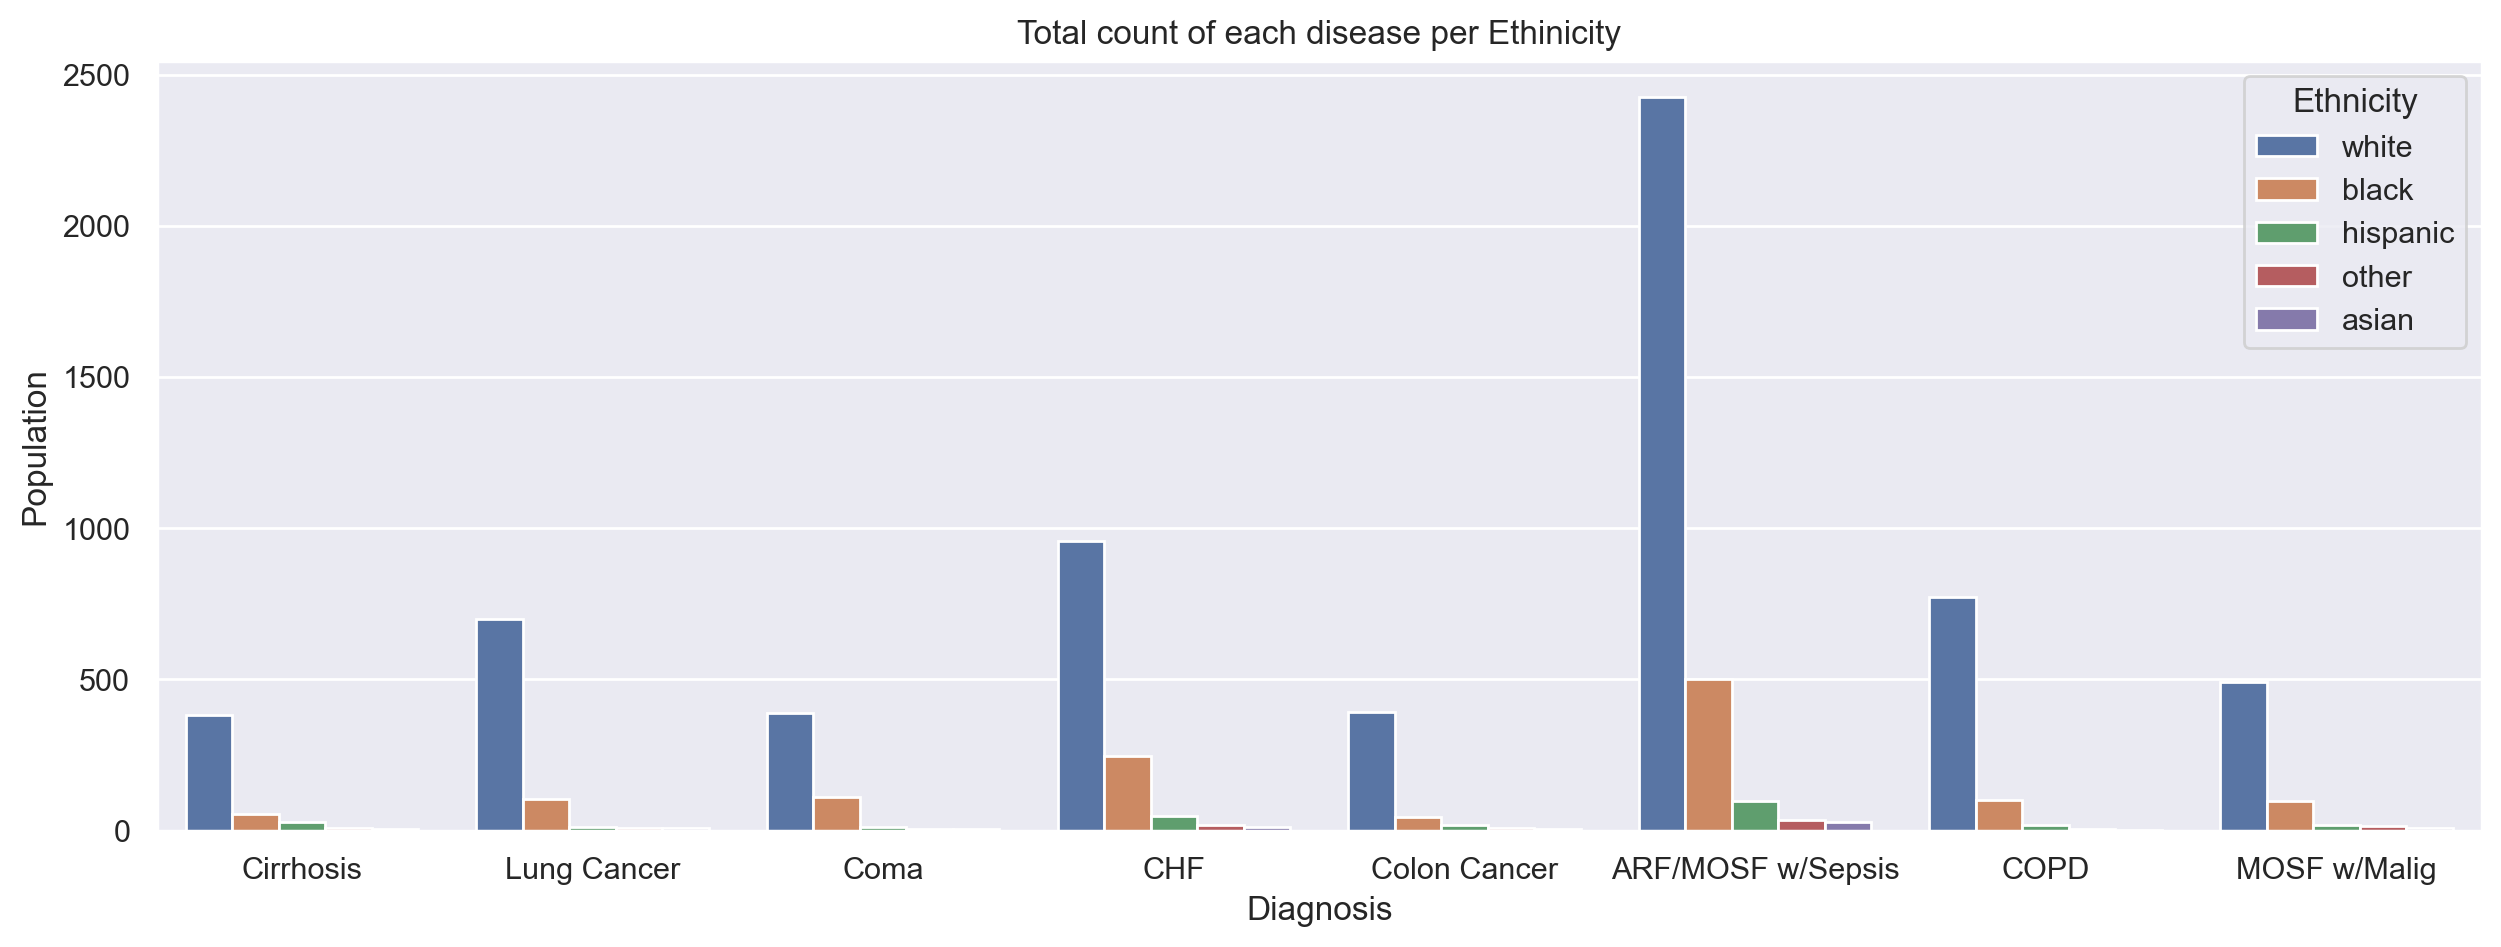

In [85]:
plt.figure(figsize = (15,5), dpi = 200);

sns.countplot(df, x = 'dzgroup', hue = 'race');
plt.title('Total count of each disease per Ethinicity');
plt.xlabel('Diagnosis');
plt.ylabel('Population');
plt.legend(title = 'Ethnicity');

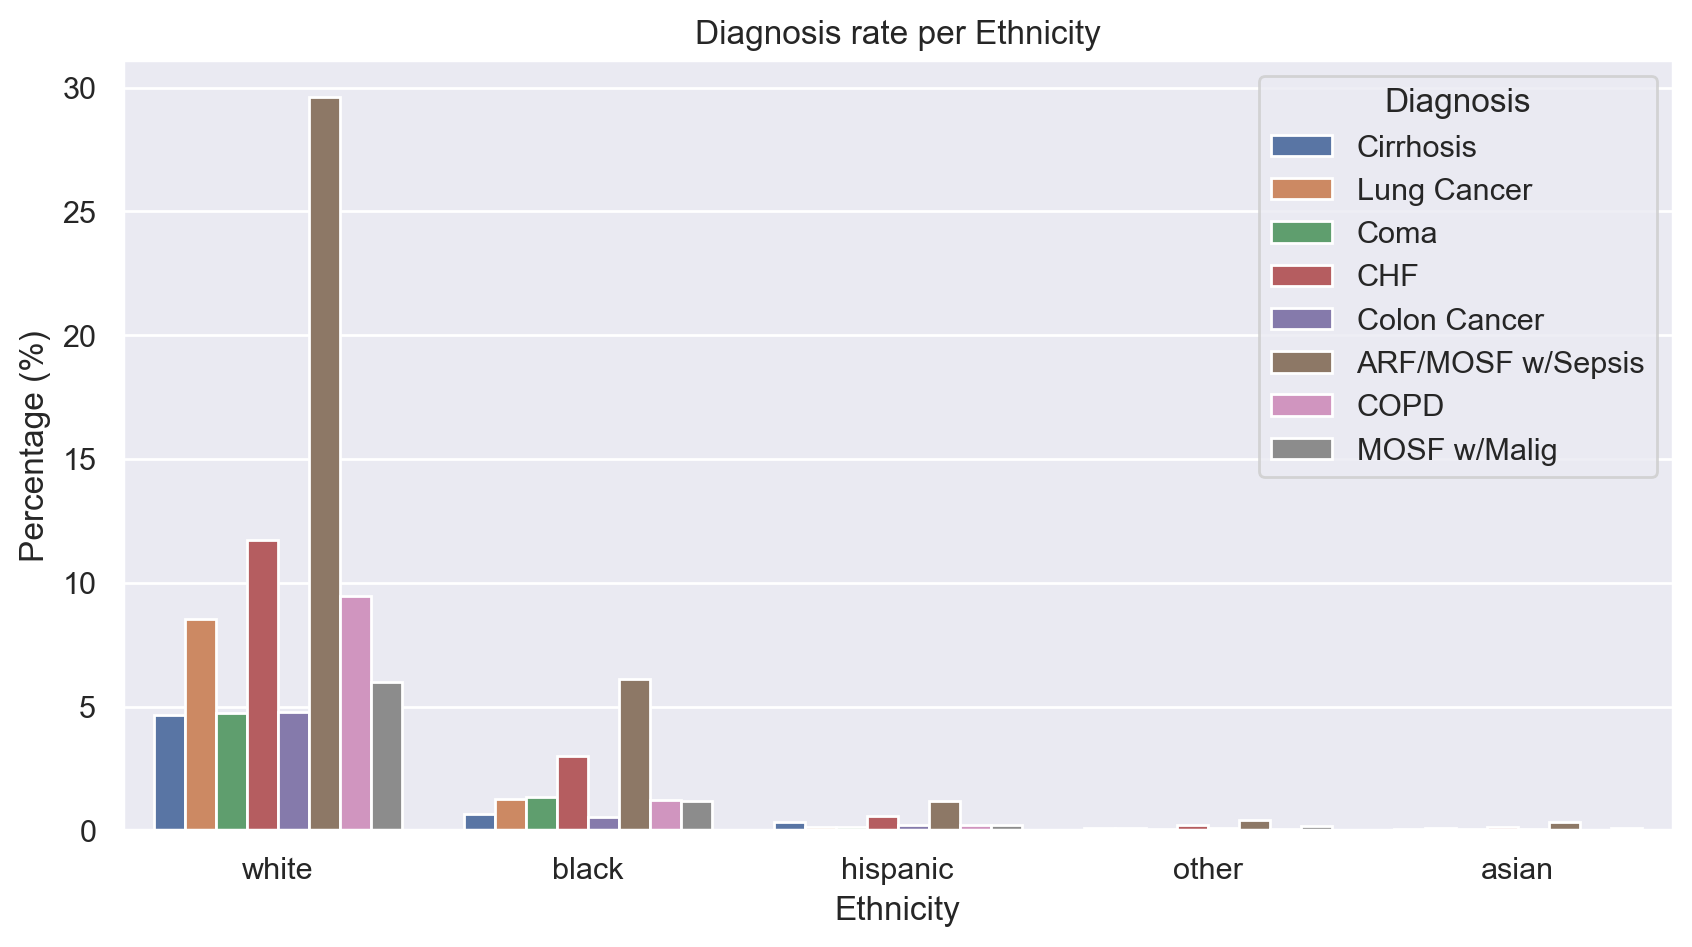

In [86]:
plt.figure(figsize = (10,5), dpi = 200);

sns.countplot(df, x = 'race', hue = 'dzgroup', stat='percent');
plt.title('Diagnosis rate per Ethnicity');
plt.xlabel('Ethnicity');
plt.ylabel('Percentage (%)');
plt.legend(title = 'Diagnosis');

Based on the results, the vast majority of the patients are of white ethnicity and are more susceptible to being diagnosed with life-threatening illness, with MOSF being more common within the ethnicity. In comparison, Asians and Hispanics are less likely to be diagnosed with the condition. 

### 3) Build a correlation matrix to see if we can spot any correaltion to the deaths 

Using an encoding method for the following columns: age, dzgroup, race and ca columns to see if there are any correlations with the other columns and results. The strings will become integers.

In [87]:
df['age_enc'] = df['sex'].map({'male': 0, 'female': 1})
df['dzgroup_enc'] = df['dzgroup'].map({'ARF/MOSF w/Sepsis': 0, 'CHF': 1, 'COPD': 2, 'Lung Cancer': 3, 'MOSF w/Malig': 4, 'Coma': 5,
                            'Colon Cancer': 6, 'Cirrhosis': 7})
df['race_enc'] = df['race'].map({'other': 0, 'white': 1, 'black': 2, 'hispanic': 3, 'asian': 4})
df['ca_enc'] = df['ca'].map({'metastatic': 0, 'no': 1, 'yes': 2})

In [88]:
df.head(3)

,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,income,charges,race,surv2m,surv6m,diabetes,ca,dnr,meanbp,wblc,hrt,temp,crea,sod,adlsc,age_enc,dzgroup_enc,race_enc,ca_enc
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,52,1,female,0,17,47,Cirrhosis,2,under $11k,41094,white,0.8,0.7,0,no,no dnr,70,8.5,88,37.4,2.0,134,0,1,7,1,1
4,42,1,female,0,3,133,Lung Cancer,2,under $11k,3075,white,0.7,0.4,0,metastatic,no dnr,75,9.1,88,35.0,0.8,139,0,1,3,1,0
6,93,1,male,1,4,4,Coma,1,undisclosed,6884,white,0.3,0.2,0,no,no dnr,110,10.4,101,38.4,0.7,140,1,0,5,1,1


In [89]:
df_num = df[['age', 'death', 'hospdead', 'num.co', 'surv2m', 'surv6m', 'diabetes', 'meanbp', 'wblc', 'hrt', 'temp', 'crea', 'sod', 'adlsc', 'age_enc', 'race_enc', 'dzgroup_enc', 'ca_enc']]

In [90]:
corre_matrix = df_num.corr()

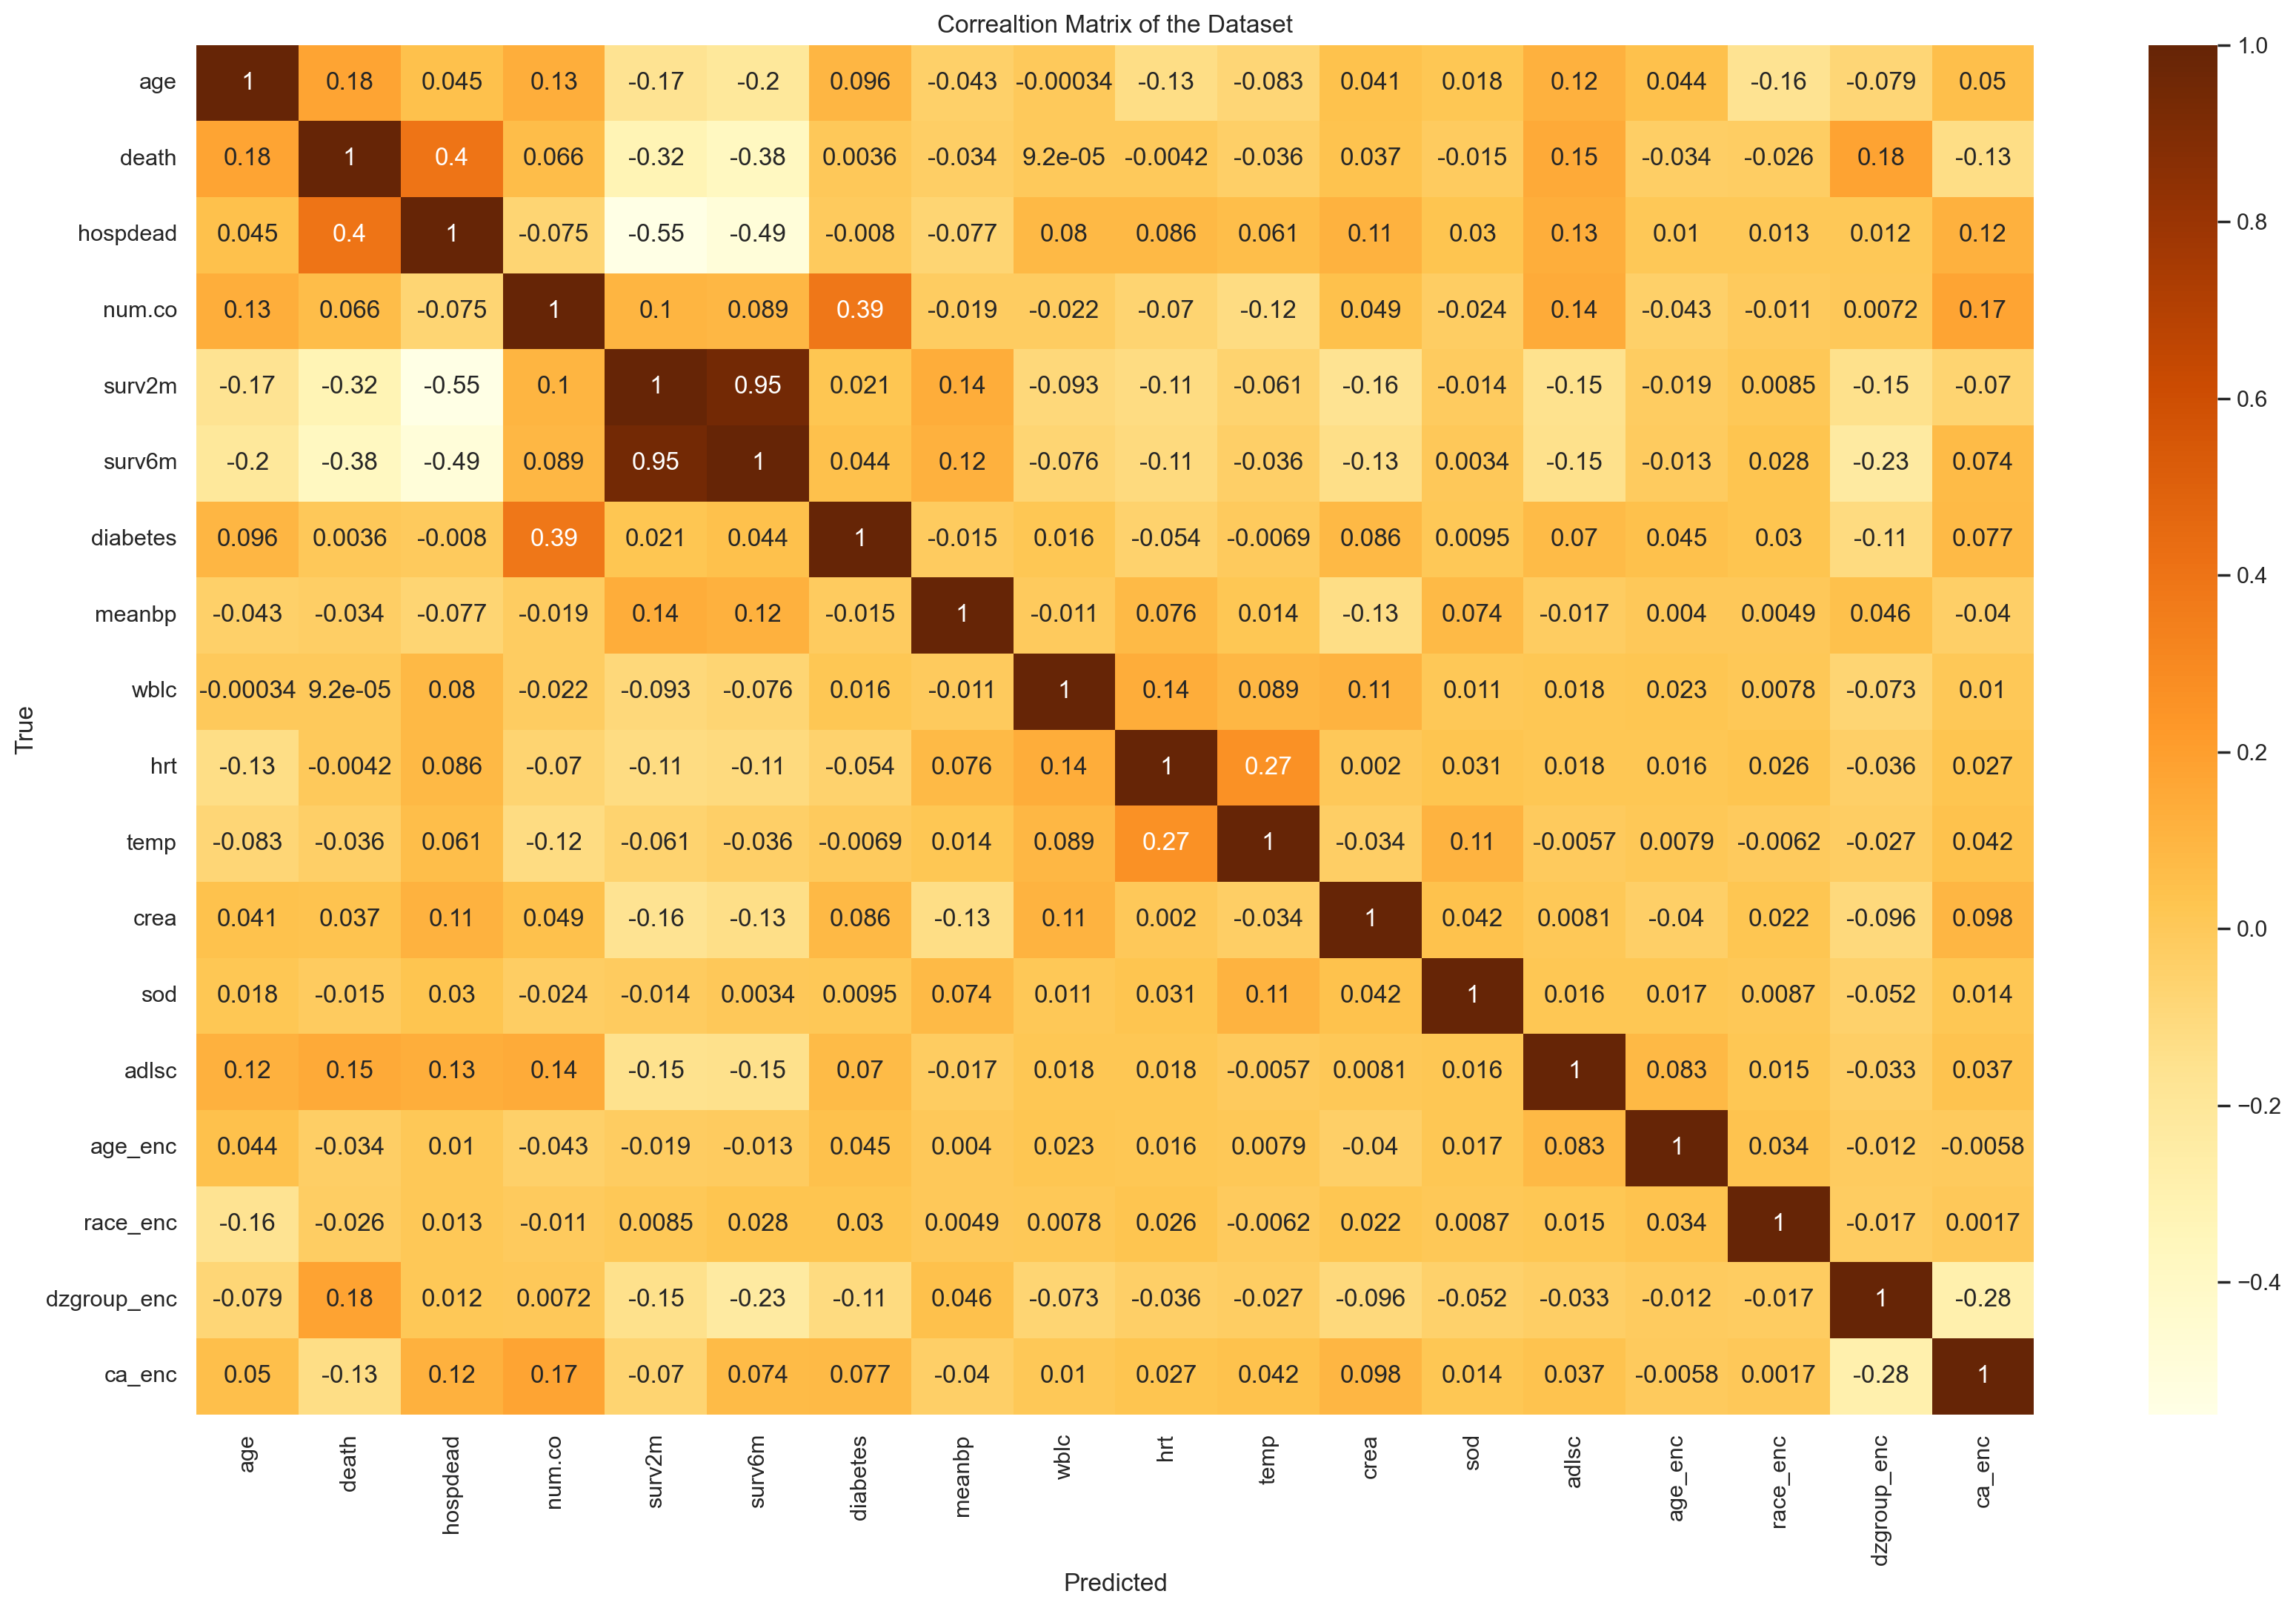

In [91]:
plt.figure( figsize = (20,12), dpi = 200)
sns.heatmap(corre_matrix, cmap='YlOrBr', annot= True);

plt.title('Correaltion Matrix of the Dataset');
plt.xlabel('Predicted');
plt.ylabel('True');

The correlation matrix indicates that 2-month and 6-month survival rates are moderately negatively correlated with both in-hospital death and overall death, as expected, since higher survival is associated with lower mortality. Diabetes shows a moderate positive correlation with comorbidity count, suggesting diabetic patients tend to have more recorded conditions. Temperature and heart rate also show a weak-to-moderate positive association. Finally, survival at 2 months and 6 months is highly correlated, indicating a similar outcome.